### Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

## 1. Pensando como un/a Data Scientist


Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Hay determinadas características y parámetros objetivos que determinan la tasación de un inmueble.
El precio de un inmueble puede estar dado principalmente por la superficie cubierta y total, y su ubicación. Por lo tanto considero que son datos que obligadamente habra que tener para resolver el problema.
También se necesitará conocer detalles de cantidad de ambientes y calidad de construcción ya que también serán datos útiles, que afectan el precio.
Estos datos ayudan a determinar un modelo comprendido por ciertas variables que permitan tipificar los inmuebles y agruparlos adecuadamente para predecir su tasación (precio).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

## 2.0 Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



In [2]:
# Ejecutando comando para conectarse al repositorio DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando dataset properati desde ubicación de DRIVE
properati = pd.read_csv('/content/drive/MyDrive/Data Science/Sprint Project 1/DS_Proyecto_01_Datos_Properati.csv')

## 2.1. Importa las librerías necesarias para trabajar en la consigna.

In [4]:
# Importando las primeras librerías requeridas para EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1.1. Carga el dataset. 

Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [5]:
properati.head(3)

start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta

[3 rows x 19 columns]

In [ ]:
# Se imprime el shape del dataset para saber como se componen sus instancias y columnas:
properati.shape

(146660, 19)

### 2.1.2. **Valores Faltantes**: 

imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
print('Columnas Dataset properati:')
properati.columns

Columnas Dataset properati:


Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
#Los siguientes comandos comentados (#) fueron listados para tenerlos en cuenta, según se requieran:
                                                                        #pd.DataFrame.count(properati,axis=0)
                                                                        #properati_null = pd.DataFrame.isnull(properati)
                                                                        #start_date = pd.DataFrame(properati[properati.columns[0]])
                                                                        #pd.DataFrame.isnull(start_date)

#Creamos un array para llamar las columnas del dataset y explorar la cantidad de nulos por columna
indice_col = np.arange(0,19,1)                                  

for i in indice_col:
    array_columna = np.asarray(pd.DataFrame.isnull(pd.DataFrame(properati[properati.columns[i]]))) # Se evalúa que celda contiene info y nulos
    val_y_null = np.unique(array_columna, return_counts=True)                                      # entrega una tupla con la cantidad de celdas con valor y nulos
    val_y_null_arr = np.asarray(val_y_null)                                                        # convertimos la tupla en array
    #print(type(val_y_null_arr))
    if val_y_null_arr.shape == (2, 2):                                                             # if para mostrar solo las columnas que tienen nulos
        print('Columna: ',properati.columns[i])                                                    # print para mostrar el nombre de la columna
        val_y_null_df = pd.DataFrame(val_y_null, columns= ['Cant. c/Valor','Cant. Nulos'])  
    #val_y_null_df_col = pd.DataFrame(val_y_null_df, columns= ['Cant. c/Valor','Cant. Nulos'])
    #print('Columna 0: Cant. c/Valor - Columna 1: Cant. Nulos')
        print(val_y_null_df)                                                       # imprime una tabla con la cant. de celdas con valores y nulos,
                                                                                   # por cada columna, sólo si la columna tiene nulos.

Columna:  lat
  Cant. c/Valor Cant. Nulos
0         False        True
1        136735        9925
Columna:  lon
  Cant. c/Valor Cant. Nulos
0         False        True
1        136701        9959
Columna:  bathrooms
  Cant. c/Valor Cant. Nulos
0         False        True
1        140703        5957
Columna:  surface_total
  Cant. c/Valor Cant. Nulos
0         False        True
1        126133       20527
Columna:  surface_covered
  Cant. c/Valor Cant. Nulos
0         False        True
1        125046       21614


In [ ]:
# CALCULANDO CUANTO REPRESENTAN ESOS NULOS EN CADA COLUMNA:
filas = properati.shape[0]
print("Porcentaje de valores nulos presentes en cada columna:")
# Calculando para latitude:
nulls_lat = properati["lat"].isnull().sum()
porcentaje_nulls_lat = nulls_lat*100/filas
print("Cantidad de nulos en latutid: ", nulls_lat, 'Porcentaje de nulos en ´Latitud´: ', np.round(porcentaje_nulls_lat, decimals=0), '%')
# Calculando para longitud:
nulls_lon = properati["lon"].isnull().sum()
porcentaje_nulls_lon = nulls_lon*100/filas
print("Cantidad de nulos en ´Longitud´: ", nulls_lon,'Porcentaje de nulos en ´Longintud´: ', np.round(porcentaje_nulls_lon, decimals=0), '%')
# Calculando para baños:
nulls_bathrooms = properati["bathrooms"].isnull().sum()
porcentaje_nulls_bathrooms = nulls_bathrooms*100/filas
print("Cantidad de nulos en baños: ", nulls_bathrooms, 'Porcentaje de nulos en baños: ', np.round(porcentaje_nulls_bathrooms, decimals=0), '%')
# Calculando para superficie total:
nulls_surface_total = properati["surface_total"].isnull().sum()
porcentaje_nulls_surface_total = nulls_surface_total*100/filas
print("Cantidad de nulos en Sup Total: ", nulls_surface_total, 'Porcentaje de nulos en Sup Total: ', np.round(porcentaje_nulls_surface_total, decimals=0), '%')
# Calculando para superficie cubierta:
nulls_surface_covered = properati["surface_covered"].isnull().sum()
porcentaje_nulls_surface_covered = nulls_surface_covered*100/filas
print("Cantidad de nulos en Sup Cubierta: ", nulls_surface_covered, 'Porcentaje de nulos en Sup Cubierta: ', np.round(porcentaje_nulls_surface_covered, decimals=0), '%')

Porcentaje de valores nulos presentes en cada columna:
Cantidad de nulos en latutid:  9925 Porcentaje de nulos en ´Latitud´:  7.0 %
Cantidad de nulos en ´Longitud´:  9959 Porcentaje de nulos en ´Longintud´:  7.0 %
Cantidad de nulos en baños:  5957 Porcentaje de nulos en baños:  4.0 %
Cantidad de nulos en Sup Total:  20527 Porcentaje de nulos en Sup Total:  14.0 %
Cantidad de nulos en Sup Cubierta:  21614 Porcentaje de nulos en Sup Cubierta:  15.0 %


In [ ]:
print('Observamos a continuación los valores estadísticos de las columnas: lat, lon, rooms, bedrooms, bathrooms, surface_total, surface_covered y price.')
properati.describe(percentiles=[0.1,0.2,0.5,0.7,0.8,0.9])

Observamos a continuación los valores estadísticos de las columnas: lat, lon, rooms, bedrooms, bathrooms, surface_total, surface_covered y price.


lat            lon  ...  surface_covered         price
count  136735.000000  136701.000000  ...    125046.000000  1.466600e+05
mean      -34.604896     -58.465304  ...       112.818011  2.412211e+05
std         0.468428       0.486190  ...       916.857584  3.185195e+05
min       -35.318457    -180.000000  ...         1.000000  5.500000e+03
10%       -34.712655     -58.632007  ...        37.000000  8.000000e+04
20%       -34.638775     -58.531781  ...        44.000000  1.000000e+05
50%       -34.600943     -58.443262  ...        68.000000  1.660000e+05
70%       -34.582158     -58.415733  ...        96.000000  2.400000e+05
80%       -34.564191     -58.400733  ...       123.000000  2.980000e+05
90%       -34.495633     -58.379772  ...       180.000000  4.300000e+05
max        85.051129     -57.805832  ...    126062.000000  3.243423e+07

[11 rows x 8 columns]

### 2.1.3. **Tipos de propiedad** 

¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
print('TIPO DE PROPIEDADES Y CANTIDAD DE INSTANCIAS DE CADA UNA.')

#properati_tipo = np.unique(array_columna, return_counts=True)
properati_t = pd.DataFrame(properati[properati.columns[17]])    # separa la columna property_type del dataframe.
properati_t_arr = np.asarray(properati_t)                       # convierte el dataframe 'property_type' en array para poder aplicarle 'np.unique()'.
tipo_y_cant = np.unique(properati_t_arr, return_counts=True)    # selecciona cada tipo distinto de inmueble y pedimos la cantidad de cada uno (tupla).
tipo_y_cant_arr = np.asarray(tipo_y_cant)                       # Convierte la tupla en np.array.
tipo_y_cant_df = pd.DataFrame(tipo_y_cant)                      # Convierte la tupla en pd.dataframe.
#print(type(tipo_y_cant_df))                                    # Confirma que sea un dataframe (sirve como punto de control).
tipo_y_cant_df                                                  # Imprime el dataframe.

TIPO DE PROPIEDADES Y CANTIDAD DE INSTANCIAS DE CADA UNA.


0              1        2             3  ...     6        7     8      9
0   Casa  Casa de campo  Cochera  Departamento  ...  Lote  Oficina  Otro     PH
1  21521            322      259        107326  ...  1312      658   374  14298

[2 rows x 10 columns]

Se transpolan las filas y columna para su posterior graficación.

Array de tipo de inmuebles y cantidad de instancias de cada uno:
                 0       1
3     Departamento  107326
0             Casa   21521
9               PH   14298
6             Lote    1312
7          Oficina     658
8             Otro     374
5  Local comercial     325
1    Casa de campo     322
4         Depósito     265
2          Cochera     259




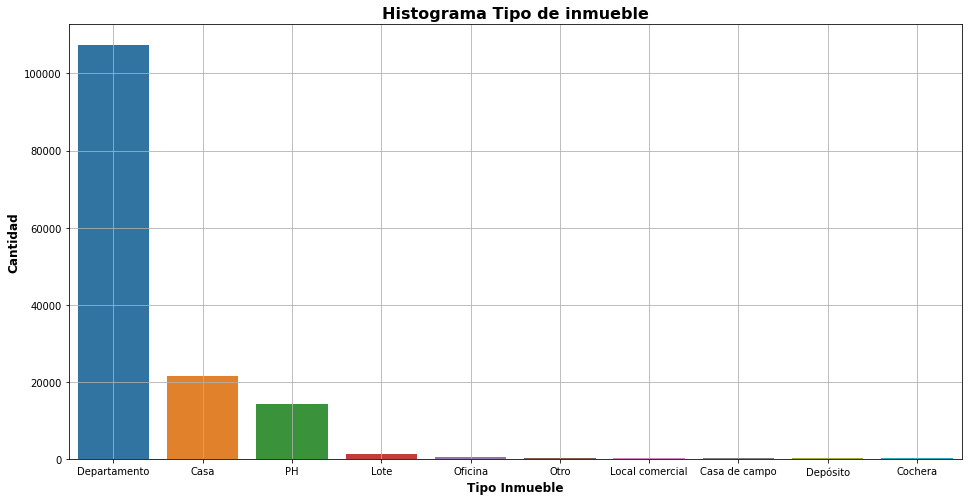

In [ ]:
# Antes de crear un gráfico de barras para visualizar la cantidad de cada tipo de inmueble en el dataset, adecuamos el dataframe,
# transpolando las filas y columnas:
a = """Se transpolan las filas y columna para su posterior graficación.

Array de tipo de inmuebles y cantidad de instancias de cada uno:"""

print(a)
tipo_y_cant_df_swap = pd.DataFrame.swapaxes(tipo_y_cant_df, 0, 1)

# Se procede a ordenar los tipos de inmuebles por cantidad de instancias:
ordenado = tipo_y_cant_df_swap.sort_values(1,axis=0, ascending=False)
print(ordenado)
print("""
""")

columna = 'property_type'

# Se crea la figura:
plt.figure(figsize=(16,8))

# Se crea el plot:
ax1 = sns.barplot(x=ordenado[0], y=ordenado[1] )

ax1.set_title('Histograma ' + 'Tipo de inmueble', fontweight ="bold", fontsize=16, color="black")
plt.xlabel('Tipo Inmueble', fontsize=12, fontweight ="bold")
plt.ylabel('Cantidad', fontsize=12, fontweight ="bold")
plt.grid()

### 2.1.4. Zonas y Barrios

¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
# Primereo se procede a ordenar las zonas y barrios según la cantidad de inmuebles registrados para cada uno:

# Ordenando Zonas según cantidad de inmuebles:

zona = properati['l2']
zona_arr = np.asarray(zona)
zona_arr_unique = np.unique(zona_arr, return_counts=True)                        # Se determina la cantidad de inmuebles por cada zona.
zona_arr_unique_df = pd.DataFrame(zona_arr_unique)                     
zona_arr_unique_df_swap = pd.DataFrame.swapaxes(zona_arr_unique_df, 0, 1)        # Se transponen filas y columnas para luego graficar.

zona_ordenado = zona_arr_unique_df_swap.sort_values(1,axis=0, ascending=False)

# Ordenando ahora los barrios, según cantidad de inmuebles:

barrio = properati['l3']
barrio_arr = np.asarray(barrio)
barrio_arr_unique = np.unique(barrio_arr, return_counts=True)                        # Se determina la cantidad de inmuebles por cada barrio.
barrio_arr_unique_df = pd.DataFrame(barrio_arr_unique)                     
barrio_arr_unique_df_swap = pd.DataFrame.swapaxes(barrio_arr_unique_df, 0, 1)        # Se transponen filas y columnas para luego graficar.

barrio_ordenado = barrio_arr_unique_df_swap.sort_values(1,axis=0, ascending=False)
print('Listado ordenado de Zonas: ', zona_ordenado, """


""", 'Listado ordenado de barrios: ', barrio_ordenado)

Listado ordenado de Zonas:                            0      1
3           Capital Federal  92539
0  Bs.As. G.B.A. Zona Norte  24282
2    Bs.As. G.B.A. Zona Sur  17173
1  Bs.As. G.B.A. Zona Oeste  12666 


 Listado ordenado de barrios:                    0      1
48          Palermo  13073
70            Tigre   8718
2           Almagro   7527
8          Belgrano   6935
12        Caballito   6650
..              ...    ...
14         Cañuelas    108
86    Villa Soldati     69
84  Villa Riachuelo     42
39       Marcos Paz     35
13        Catalinas      5

[89 rows x 2 columns]


Text(0, 0.5, 'Cantidad Inmuebles')

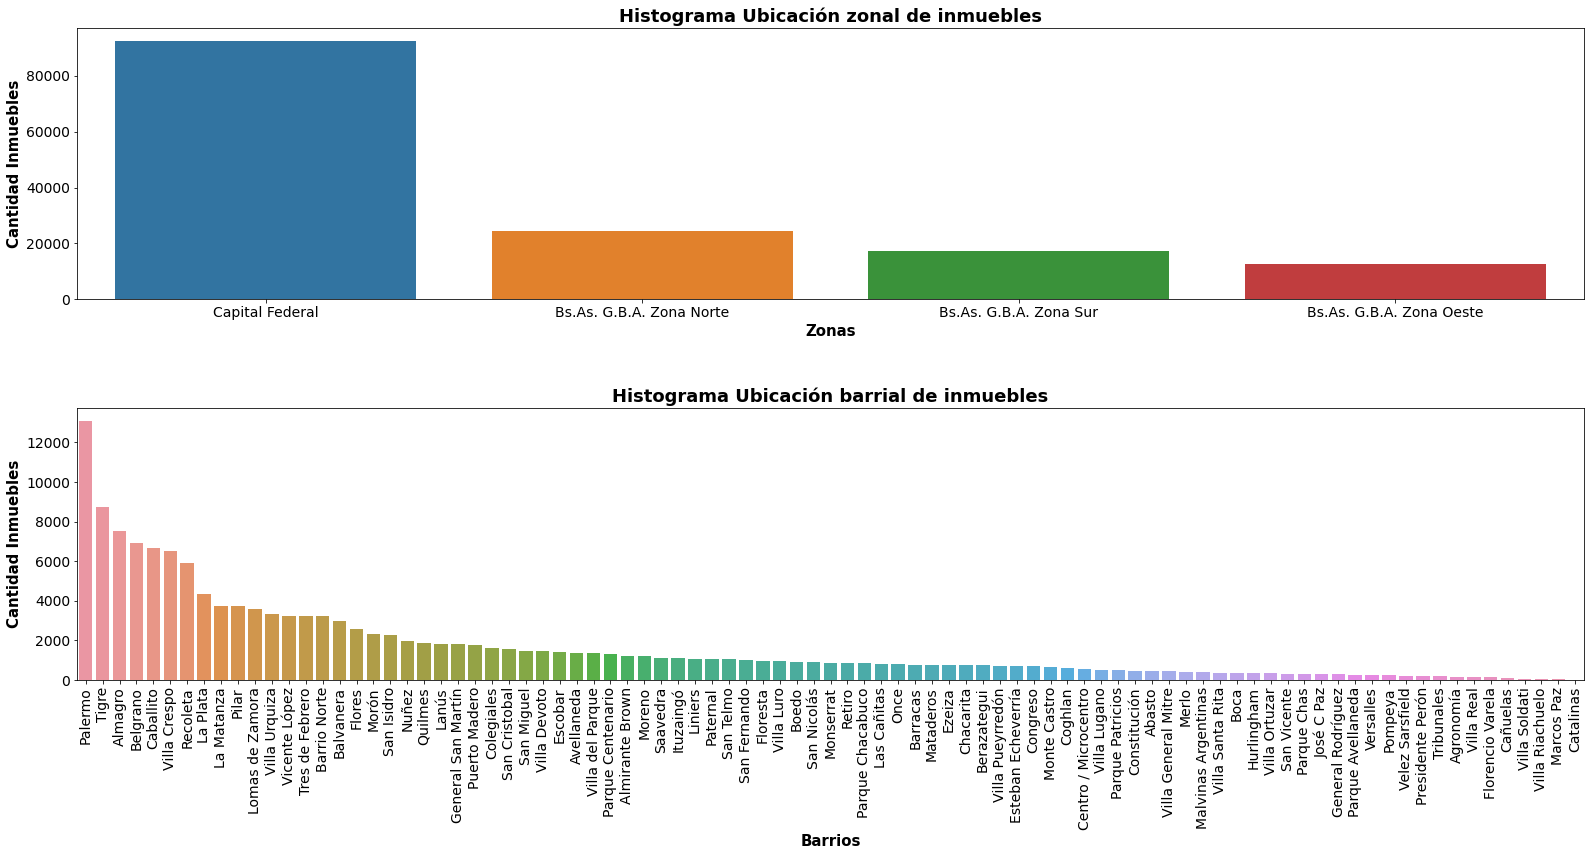

In [ ]:
# Se generan plots para ver la cantidad de inmuebles en cada zona y cada barrio (columnas 'l2' y 'l3').

plt.figure(figsize=(27,12))
plt.subplots_adjust(hspace=0.4)
plt.subplot(2,1,1)
#ax1 = sns.countplot(properati['l2'],)
ax1 = sns.barplot(x=zona_ordenado[0], y=zona_ordenado[1])
ax1.set_title('Histograma ' + 'Ubicación zonal de inmuebles', fontweight ="bold", fontsize=18, color="black", )
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('Zonas', fontsize=15, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=15, fontweight ="bold")

plt.subplot(2,1,2)
#ax2 = sns.countplot(properati['l3'],)
ax2 = sns.barplot(x=barrio_ordenado[0], y=barrio_ordenado[1])
ax2.set_title('Histograma ' + 'Ubicación barrial de inmuebles', fontweight ="bold", fontsize=18, color="black")
plt.xticks(fontsize=14, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('Barrios', fontsize=15, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=15, fontweight ="bold")

En los plots de arriba se puede apreciar en que zonas y barrios de Capital Federal y el Conurbano bonaerense se encuentran las mayores cantidades de inmuebles, asentados en el listado de properati provisto.

Algo que podrá ser tenido en cuenta, en este trabajo o en alguno futuro, es el valor relativo de las propiedades en función a la zona o barrio al que pertenece.

A continuación se realizarán gráficos que ayudarán a entender como es la composición de los distintos tipos de inmuebles en las diferentes zonas y barrios publicados.

Iniciando por la composición de las diferentes zonas:

In [ ]:
# Se agrupa el dataset en función de las zonas y todos los tipos de propiedades existentes:

properati.groupby(["l2","property_type"], as_index= False).size().sort_values("size", ascending = False)

l2    property_type   size
33           Capital Federal     Departamento  79029
3   Bs.As. G.B.A. Zona Norte     Departamento  15668
39           Capital Federal               PH   9764
20    Bs.As. G.B.A. Zona Sur             Casa   7377
23    Bs.As. G.B.A. Zona Sur     Departamento   7041
0   Bs.As. G.B.A. Zona Norte             Casa   6439
13  Bs.As. G.B.A. Zona Oeste     Departamento   5588
10  Bs.As. G.B.A. Zona Oeste             Casa   5013
30           Capital Federal             Casa   2692
9   Bs.As. G.B.A. Zona Norte               PH   1590
19  Bs.As. G.B.A. Zona Oeste               PH   1548
29    Bs.As. G.B.A. Zona Sur               PH   1396
26    Bs.As. G.B.A. Zona Sur             Lote    657
37           Capital Federal          Oficina    458
6   Bs.As. G.B.A. Zona Norte             Lote    257
36           Capital Federal             Lote    243
25    Bs.As. G.B.A. Zona Sur  Local comercial    191
16  Bs.As. G.B.A. Zona Oeste             Lote    155
11  Bs.As. G.B.A. Zona Oeste    Casa de campo    147
28    Bs.As. G.B.A. Zona Sur             Otro    130
22    Bs.As. G.B.A. Zona Sur          Cochera    116
24    Bs.As. G.B.A. Zona Sur         Depósito    114
38           Capital Federal             Otro    114
32           Capital Federal          Cochera    106
35           Capital Federal  Local comercial    102
21    Bs.As. G.B.A. Zona Sur    Casa de campo     90
1   Bs.As. G.B.A. Zona Norte    Casa de campo     84
7   Bs.As. G.B.A. Zona Norte          Oficina     78
4   Bs.As. G.B.A. Zona Norte         Depósito     75
18  Bs.As. G.B.A. Zona Oeste             Otro     66
8   Bs.As. G.B.A. Zona Norte             Otro     64
27    Bs.As. G.B.A. Zona Sur          Oficina     61
17  Bs.As. G.B.A. Zona Oeste          Oficina     61
14  Bs.As. G.B.A. Zona Oeste         Depósito     46
34           Capital Federal         Depósito     30
12  Bs.As. G.B.A. Zona Oeste          Cochera     29
5   Bs.As. G.B.A. Zona Norte  Local comercial     19
15  Bs.As. G.B.A. Zona Oeste  Local comercial     13
2   Bs.As. G.B.A. Zona Norte          Cochera      8
31           Capital Federal    Casa de campo      1

In [ ]:
# Se grafica los distintos tipos de propiedades y sus cantidades para cada una de las zonas:

barra2 = px.bar(properati.groupby(["l2","property_type"], 
                                    as_index= False).size().sort_values("size", ascending = False),
       x='property_type',
       y="size", 
       color='property_type',
       facet_col='l2',
       template= "simple_white",
       text="size",
       color_discrete_sequence=px.colors.qualitative.Bold
       )

barra2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
barra2.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

barra2.show()

In [ ]:
# Se grafica a continuación los distintos tipos de propiedades y sus cantidades, para cada uno de los barrios del dataset:

barra2 = px.bar(properati.loc[properati.property_type.isin(["PH", "Casa", "Departamento"])  ,:].groupby(["l3","property_type"], 
                                    as_index= False).size().sort_values("size", ascending = False),
       x='l3',
       y="size", 
       color='property_type',
       #facet_row='property_type',
       template= "simple_white",
       #text="size",
       #category_orders={"horario": ["Madrugada","Mañana","Tarde","Noche"]},
       color_discrete_sequence=px.colors.qualitative.Bold
       )

barra2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
barra2.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

barra2.show()

El gráfico superior exhibe las proporciones de los tipos de propiedad, Departamento, Casa y PH ubicadas en los distintos barrios existentes en el dataset.

Como se pudo apreciar en los 2 últimos gráficos, el tipo de propiedad 'Departamento' es mayoritario para todas las zonas y barrios.

En el gráfico de arriba se puede apreciar la preponderante cantidad de departamentos correspondientes a la zona Capital Federal Vs cantidades menos disímiles de Departamento, Casa y PH para el resto de las zonas.

En cuanto al resto de los tipos de propiedades, se observa que sus cantidades participan en una proporción apreciablemente menor en prácticamente todas las zonas.

### 2.1.5. **Filtrando el Dataset:** 

A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
#Casas, departamentos y PH, son los 3 tipos más abundantes de inmuebles.
#La región con más propiedades publicadas es Capital Federal.

properati_d = properati[properati['property_type'] == 'Departamento'] #Separo los Departamentos del df principal.
properati_c = properati[properati['property_type'] == 'Casa']         #Separo las Casas del df principal.
properati_PH = properati[properati['property_type'] == 'PH']          #Separo los PH del df principal.

properati_f = properati_d.append(properati_c)                         #junto los departamentos con las casas.
properati_ff = properati_f.append(properati_PH)                       #finalmente junto los PH a los anteriores.
#v = properati_ff[properati_ff.columns[17]]     #esto es para verificar que se hizo bien el append
#v1 = np.unique(v, return_counts=True)          #esto es para verificar que se hizo bien el append
#v1                                             #esto es para verificar que se hizo bien el append

prop_checkpoint = properati_ff[properati_ff['l2'] == 'Capital Federal']
prop_checkpoint.shape
prop_checkpoint_pd = pd.DataFrame(prop_checkpoint)
prop_checkpoint_pd.shape

(91485, 19)

A continuación se intenta identificar en qué zonas se encuentra la mayoría de las propiedades.

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

### 2.1.6. **Distribuciones y relaciones de a pares:** 

Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
#Buscamos los límites de las variables rooms, bedrooms, bathrooms, surface_total, surface_covered y price, para acotar sus valores en el análisis.

#Evaluando los límites para variable rooms:
print('Evaluando los percentilos de rooms')
df = prop_checkpoint
columna = 'rooms'
print(prop_checkpoint[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print("""

Evaluando los límites según Z-score: """)
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

Evaluando los percentilos de rooms
count    91485.000000
mean         2.964278
std          1.314704
min          1.000000
10%          2.000000
50%          3.000000
90%          4.000000
max         26.000000
Name: rooms, dtype: float64


Evaluando los límites según Z-score: 
Z-score max:  6.9
Z-score min:  -1.0


Evaluando los límites según IQR: 
Outlier IQR, max:  7.0
Outlier IQR, min:  -1.0


De acuerdo a los límites estadísticos explorados para la columna 'rooms' (min, máx, Z-score e IQR), se adopta el rango 1 - 7, para graficar la distribución de la variable.
El valor mínimo, 1, surge por sentido común, ya que una vivienda no podrá tener menos que un ambiente. 

Por otro lado, el máximo, 7, se toma según el resultado de Z-score e IQR, despreciando el valor máximo = 26 por tratarse de un valor muy grande para una vivienda.

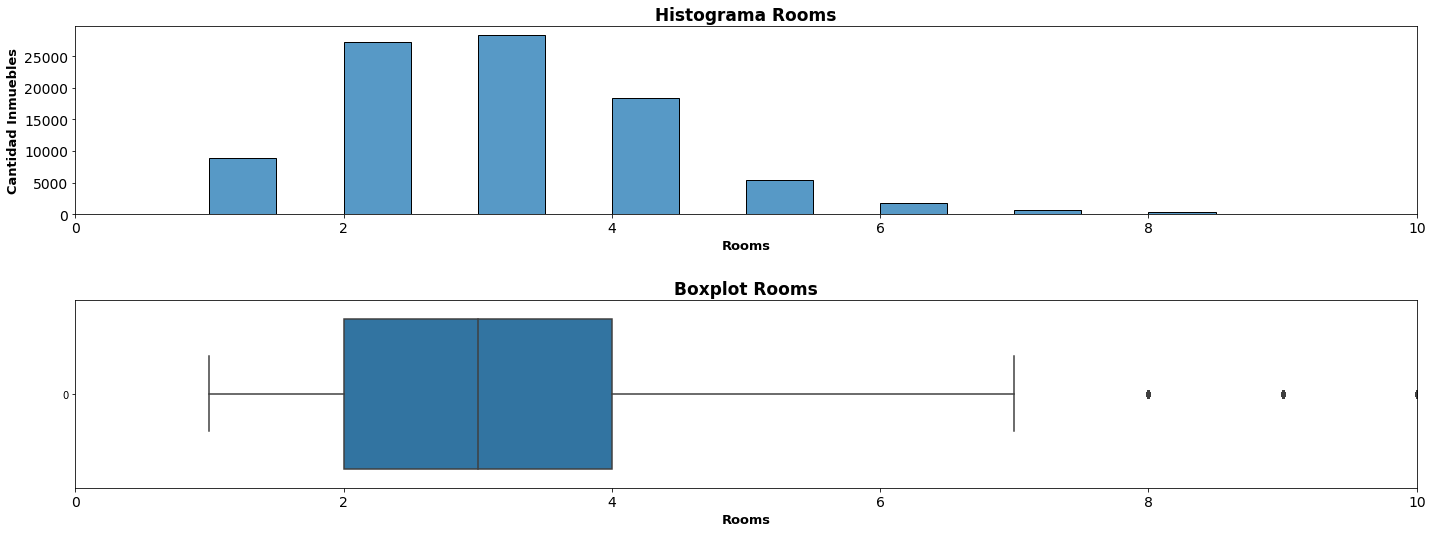

In [ ]:
# SE GRAFICA LA DISTRIBUCION DE VARIABLE: ROOMS

# Ingresar el nombre de la columna deseada:
columna = 'rooms'

# Se crea la figura
plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=10)

# Se crea el plot
ax1 = plt.subplot(2,1,1)
#sns.histplot(data=rooms_df, binwidth=.5)
sns.histplot(data= prop_checkpoint['rooms'], binwidth=.5)
ax1.set_xlim([0,10])
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=13, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data = prop_checkpoint['rooms'], orient='horizontal')
ax2.set_xlim([0,10])
ax2.set_title('Boxplot ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=13, fontweight ="bold")

plt.tight_layout()
plt.show()

In [ ]:
#Evaluando los límites para variable bedrooms:
print('Evaluando los percentilos de bedrooms')
df = prop_checkpoint
columna = 'bedrooms'
print(prop_checkpoint[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

Evaluando los percentilos de bedrooms
count    91485.000000
mean         1.960278
std          1.072946
min          0.000000
10%          1.000000
50%          2.000000
90%          3.000000
max         15.000000
Name: bedrooms, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  5.2
Z-score min:  -1.3


Evaluando los límites según IQR: 
Outlier IQR, max:  6.0
Outlier IQR, min:  -2.0


De acuerdo a los límites estadísticos explorados para la columna 'bedrooms' (min, máx, Z-score e IQR), se adopta el rango 1 - 6, para graficar la distribución de la variable. 

El valor mínimo, 1, surge por sentido común, ya que una vivienda no podrá tener menos que un dormitorio.

Por otro lado, el máximo, 6, se toma según el resultado de IQR, despreciando el valor máximo = 15 por tratarse de un valor muy grande para una vivienda.

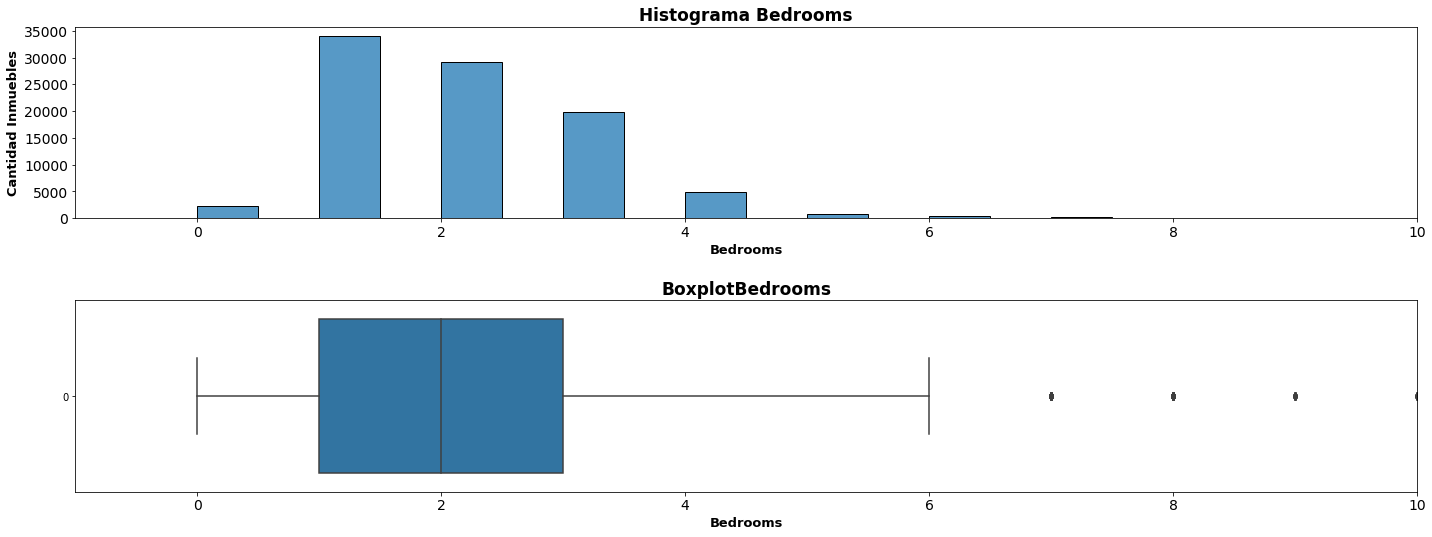

In [ ]:
# SE GRAFICA LA DISTRIBUCION DE VARIABLE: BEDROOMS

#ingresar el nombre de columna deseada:

columna= 'bedrooms'

# Se crea la figura:
plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=8)

# Se crea el plot:
ax1 = plt.subplot(2,1,1)
sns.histplot(data=prop_checkpoint['bedrooms'], binwidth=.5)
ax1.set_xlim([-1,10])
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=13, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data = prop_checkpoint['bedrooms'], orient='horizontal')
ax2.set_xlim([-1,10])
ax2.set_title('Boxplot' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=13, fontweight ="bold")

plt.tight_layout()
plt.show()

In [ ]:
#Evaluando los límites para variable bathrooms:
print('Evaluando los percentilos de bathrooms')
df = prop_checkpoint
columna = 'bathrooms'
print(prop_checkpoint[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

Evaluando los percentilos de bathrooms
count    89314.000000
mean         1.560147
std          0.860309
min          1.000000
10%          1.000000
50%          1.000000
90%          3.000000
max         14.000000
Name: bathrooms, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  4.1
Z-score min:  -1.0


Evaluando los límites según IQR: 
Outlier IQR, max:  3.5
Outlier IQR, min:  -0.5


De acuerdo a los límites estadísticos explorados para la columna 'bathrooms' (min, máx, Z-score e IQR), se adopta el rango 1 - 4, para graficar la distribución de la variable.

El valor mínimo, 1, surge por sentido común, ya que una vivienda no podrá tener menos que un baño.

Por otro lado, el máximo, 4, se toma según el resultado de Z-score, despreciando el valor máximo = 14 por tratarse de un número de baños muy grande para una vivienda.

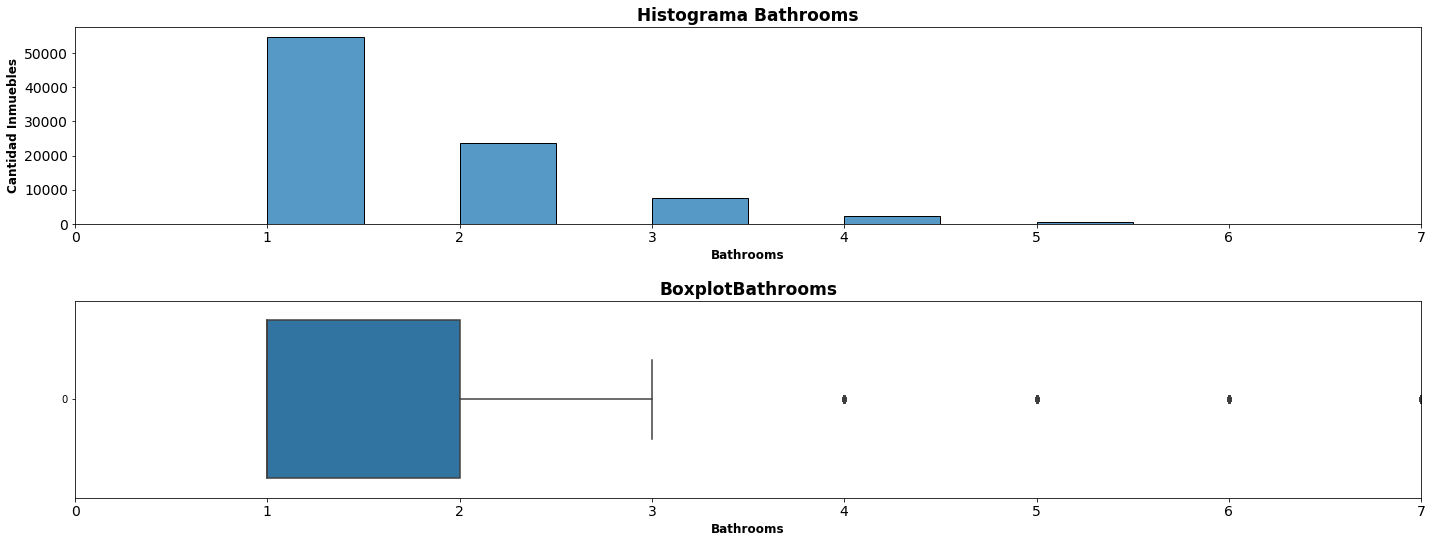

In [ ]:
#DISTRIBUCION DE VARIABLE: BATHROOMS

# Se procede a introducir el nombre de la columna deseada:

columna = 'bathrooms'

plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=8)

ax1 = plt.subplot(2,1,1)
sns.histplot(data= prop_checkpoint['bathrooms'], binwidth=.5)
ax1.set_xlim([0,7])
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=12, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data = prop_checkpoint['bathrooms'], orient='h')
ax2.set_xlim([0,7])
ax2.set_title('Boxplot' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")

plt.tight_layout()
plt.show()

In [ ]:
#Evaluando los límites para variable surface_total:

print('Evaluando los percentilos de surface_total')
df = prop_checkpoint
columna = 'surface_total'
print(prop_checkpoint[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

Evaluando los percentilos de surface_total
count     82568.000000
mean        112.626369
std         980.713664
min          10.000000
10%          39.000000
50%          71.000000
90%         180.000000
max      126062.000000
Name: surface_total, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  3054.8
Z-score min:  -2829.5


Evaluando los límites según IQR: 
Outlier IQR, max:  204.0
Outlier IQR, min:  -44.0


De acuerdo a los límites estadísticos explorados para la columna 'surface_total' (min, máx, Z-score e IQR), se adopta el rango 39 m2 - 204 m2, para graficar la distribución de la variable.

El valor mínimo, 39 m2, corresponde al percentilo 10. Cabe aclarar que dicha superficie podría corresponder a una vivienda tipo departamento monoambiente; difícilmente se pueda encontrar una vivienda que cuente con una superficie total menor a esta.

Por otro lado, el máximo, 204 m2, se toma según el resultado de IQR, despreciando el valor máximo = 126062 m2 por tratarse de un número muy grande para una vivienda.

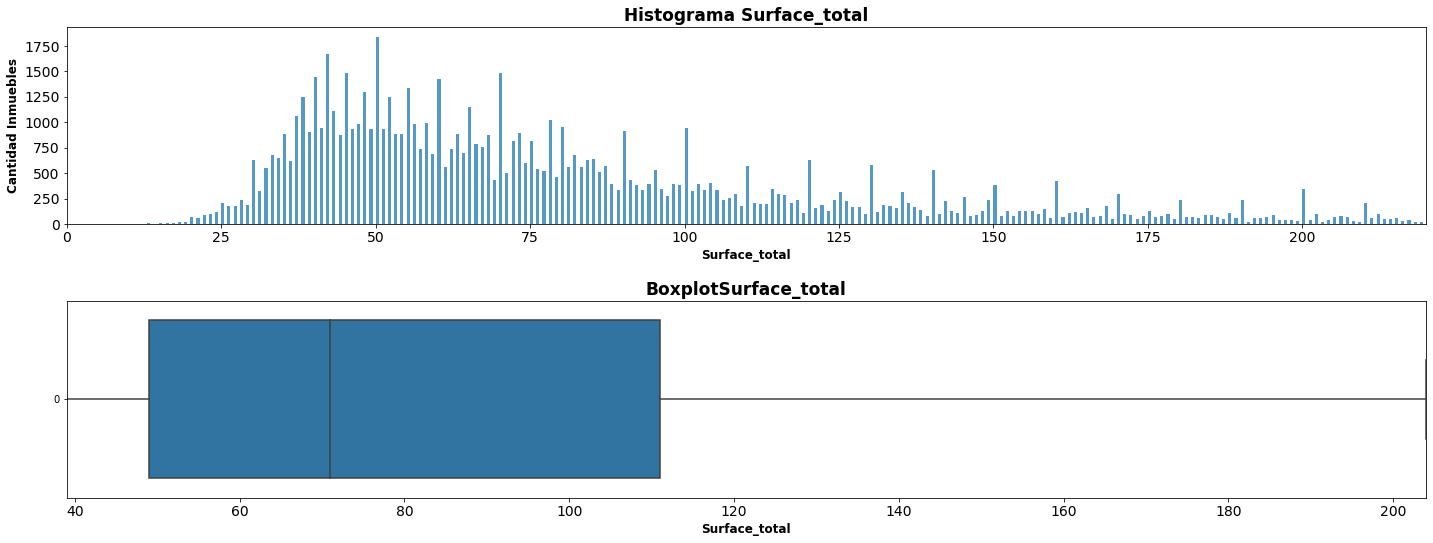

In [ ]:
#DISTRIBUCION DE VARIABLE: SURFACE_TOTAL

columna = 'surface_total'

plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=8)

ax1 = plt.subplot(2,1,1)
sns.histplot(data = prop_checkpoint[columna], binwidth=0.5)
ax1.set_xlim([0,220])                                                                             # Se incrementa el intervalo del gráfico para mejor visualización.
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=12, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data = prop_checkpoint[columna], orient='h')
ax2.set_xlim([39,204])
ax2.set_title('Boxplot' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")

plt.tight_layout()
plt.show()

In [ ]:
#Evaluando los límites para variable surface_covered:

print('Evaluando los percentilos de surface_covered')
df = prop_checkpoint
columna = 'surface_covered'
print(prop_checkpoint[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

Evaluando los percentilos de surface_covered
count     82250.000000
mean         94.966310
std         778.515243
min           1.000000
10%          36.000000
50%          63.000000
90%         151.000000
max      126062.000000
Name: surface_covered, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  2430.5
Z-score min:  -2240.6


Evaluando los límites según IQR: 
Outlier IQR, max:  174.0
Outlier IQR, min:  -34.0


De acuerdo a los límites estadísticos explorados para la columna 'surface_covered' (min, máx, Z-score e IQR), se adopta el rango 36 m2 - 174 m2, para graficar la distribución de la variable.

El valor mínimo, 36 m2, corresponde al percentilo 10 de la variable. Cabe aclarar que dicha superficie podría corresponder a una vivienda tipo departamento monoambiente; difícilmente se pueda encontrar una vivienda que cuente con una superficie total menor a esta.

Por otro lado, el máximo, 174 m2, se toma según el resultado de IQR, despreciando el valor máximo = 126062 m2 por tratarse de un número muy grande de superficie cubierta para una vivienda.

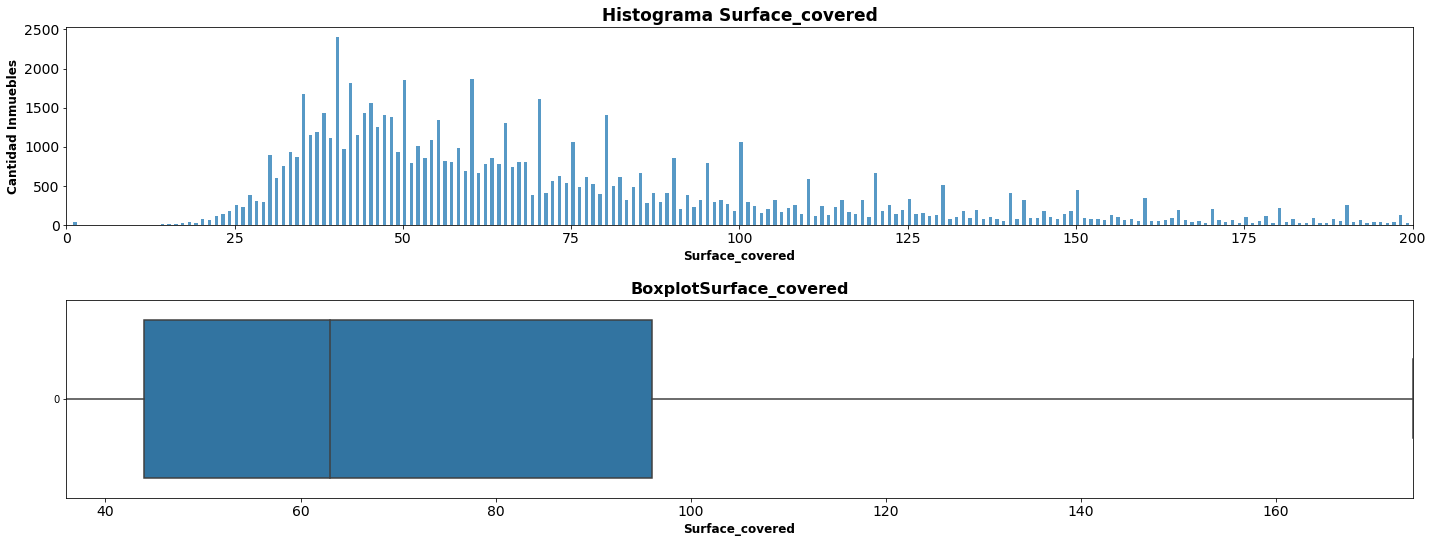

In [ ]:
#DISTRIBUCION DE VARIABLE: SURFACE_COVERED

columna = 'surface_covered'

plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=8)

ax1 = plt.subplot(2,1,1)
sns.histplot(data = prop_checkpoint[columna], binwidth=0.5)
ax1.set_xlim([0,200])                                                                               # Se incrementa el intervalo del gráfico para mejor visualización.
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=12, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data = prop_checkpoint[columna], orient='h')
ax2.set_xlim([36,174])
ax2.set_title('Boxplot' + columna.capitalize(), fontweight ="bold", fontsize=16, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")


plt.tight_layout()
plt.show()

In [ ]:
#Evaluando los límites para variable price:
print('Evaluando los percentilos de price')
df = prop_checkpoint
columna = 'price'
print(prop_checkpoint[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

Evaluando los percentilos de price
count    9.148500e+04
mean     2.595003e+05
std      3.222654e+05
min      6.000000e+03
10%      9.000000e+04
50%      1.750000e+05
90%      4.600000e+05
max      3.243423e+07
Name: price, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  1226296.6
Z-score min:  -707296.1


Evaluando los límites según IQR: 
Outlier IQR, max:  517500.0
Outlier IQR, min:  -118500.0


De acuerdo a los límites estadísticos explorados para la columna 'price' (min, máx, Z-score e IQR), se adopta el rango USD 90.000 - USD 517.500, para graficar la distribución de la variable.

El valor mínimo, USD 90.000, corresponde al percentilo 10 de la variable.

Por otro lado, el máximo, USD 517.500, se toma según el resultado de IQR, despreciando el valor máximo y Z-score máximo, por tratarse de precios muy altos para los tipos de vivienda publicados.

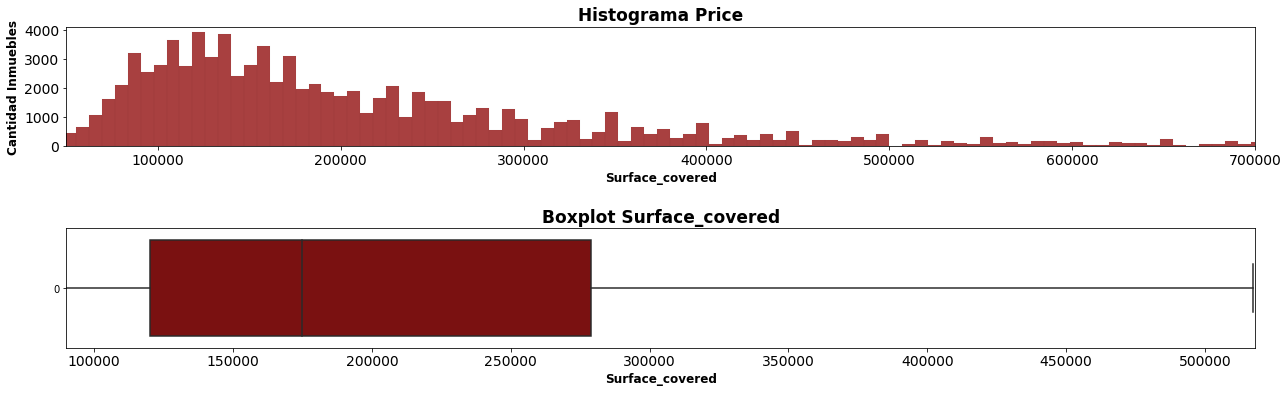

In [ ]:
#DISTRIBUCION DE VARIABLE: PRECIO 
 
#1) Se define nombre genérico para el dataframe y la columna, como variables:
df_a = prop_checkpoint
columna_a_evaluar = 'price'
 
#Ploteando:
 
plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=8)
 
#Histograma
ax1 = plt.subplot(2,1,1)
sns.histplot(data=df_a[columna_a_evaluar], color='darkred')
plt.xlabel(columna_a_evaluar.capitalize(), fontweight ="bold", fontsize=12, color="black")
plt.xticks(fontsize=12, color="black", rotation=0)
plt.xticks(fontsize=12, color="black", rotation=0)
ax1.set_xlim([50000,700000])                                                                                 # Se incrementa el intervalo del gráfico para mejor visualización.

ax1.set_title('Histograma ' + columna_a_evaluar.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=12, fontweight ="bold")
 
#Boxplot:
ax2 = plt.subplot(2,1,2)
sns.boxplot(data = df_a[columna_a_evaluar], color='darkred', orient= 'horizontal')
ax2.set_xlim([90000,518000])
ax2.set_title('Boxplot ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")

# ax2.title.set_text("Boxplot " + columna_a_evaluar.capitalize())

plt.tight_layout()

A continuación se crea un dataset filtrado de acuerdo a lo considerado en los límites estadísticos evaluados, para cada variable.

In [ ]:
prop_f1 = prop_checkpoint
prop_f2 = prop_f1.loc[(prop_f1['rooms'].between(1,7) & prop_f1['bedrooms'].between(1,6) & prop_f1['bathrooms'].between(1,4) & prop_f1['surface_total'].between(35,204) &
                       prop_f1['surface_covered'].between(35,174) & prop_f1['price'].between(90000,518000)),
                      ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']]
prop_f2.shape

(61085, 7)

Se procede a realizar un gráfico 'pairplot' de Seaborn para relacionar las variables entre sí y visualizar posibles tendencias.

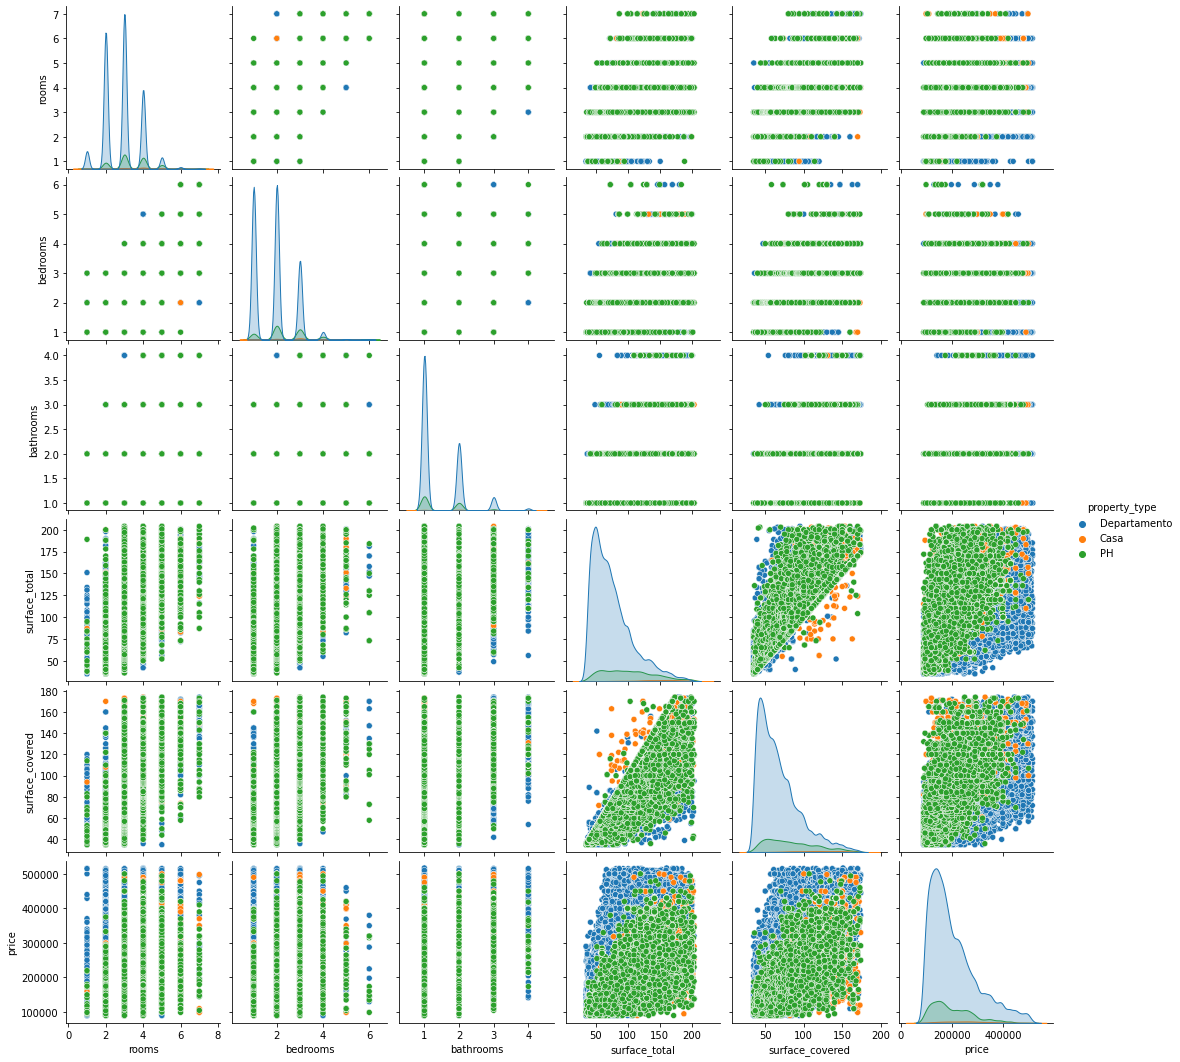

In [ ]:
sns.pairplot(prop_f2, hue='property_type')

A continuación se realizarán gráficas para tratar de visualizar potenciales correlaciones entre variables y precio para los 3 distintos tipos de propiedades: Casas, Departamentos, PH.

**Gráficos para Casas:**

Gráficos de precios en función de variables para Casas


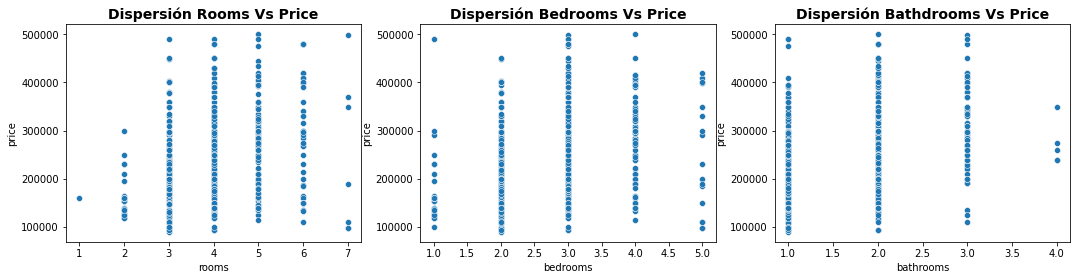

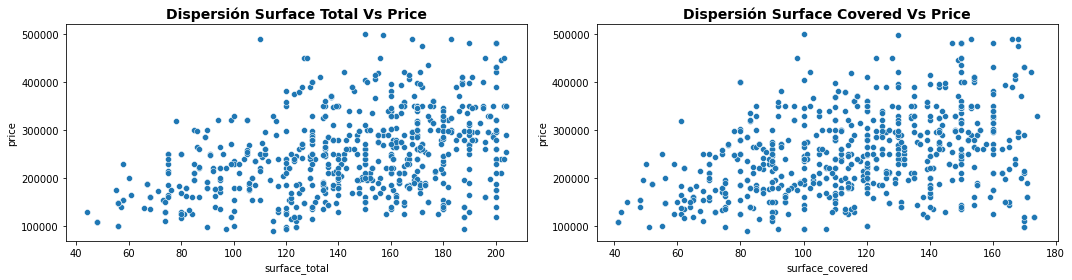

In [ ]:
# En esta sección se buscará graficar las variables contra precio para advertir potencial correlación
# Filtramos el dataset para graficar solo valores de casas:
prop_f2_casa = prop_f2[prop_f2['property_type'] == 'Casa']

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
ax1 = sns.scatterplot(x=prop_f2_casa['rooms'], y=prop_f2_casa['price'])
ax1.set_title('Dispersión Rooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,3,2)
ax2 = sns.scatterplot(x=prop_f2_casa['bedrooms'], y=prop_f2_casa['price'])
ax2.set_title('Dispersión Bedrooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,3,3)
ax3 = sns.scatterplot(x=prop_f2_casa['bathrooms'], y=prop_f2_casa['price'])
ax3.set_title('Dispersión Bathdrooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.figure(figsize=(15,4),)
plt.subplot(1,2,1)
ax4 = sns.scatterplot(x=prop_f2_casa['surface_total'], y=prop_f2_casa['price'])
ax4.set_title('Dispersión Surface Total Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,2,2)
ax5 = sns.scatterplot(x=prop_f2_casa['surface_covered'], y=prop_f2_casa['price'])
ax5.set_title('Dispersión Surface Covered Vs Price', fontweight ="bold", fontsize=14, color="black")

print('Gráficos de precios en función de variables para Casas')
plt.tight_layout()
plt.show()

En el grupo de gráficos para casas no se observa una tendencia definida en la relación entre rooms, bedrooms, bathrooms Vs precio. Se puede apreciar una tendencia de aumento de precios al incrementar 'rooms' desde 1 a 5, que no se sostiene más allá de ese valor.

Algo similar ocurre con la variable 'bedrooms'. Se observa una tendencia a incrementar el precio para un rango apriximado de 'bedrooms' de 1 a 3, que al igual que en el caso de 'rooms', no se sostiene más allá de ese valor.

Siguiendo con la dispersión entre 'bathrooms' Vs precio, tampoco se aprecia una tendencia sostenida de precio frente al incremento de baños.

Sí alcanza a observarse algún grado de correlación para los casos de surface_total y surface_covered Vs precio. Se puede apreciar, aunque con gran dispersión, una tendencia a incrementarse los precios de las propiedades, a medida que se incrementa la superficie total y cubierta.

**Gráficos para Departamentos:**

Gráficos de precios en función de variables para Departamentos


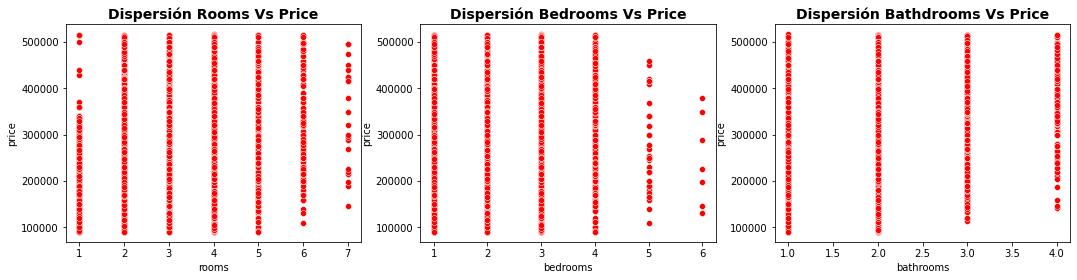

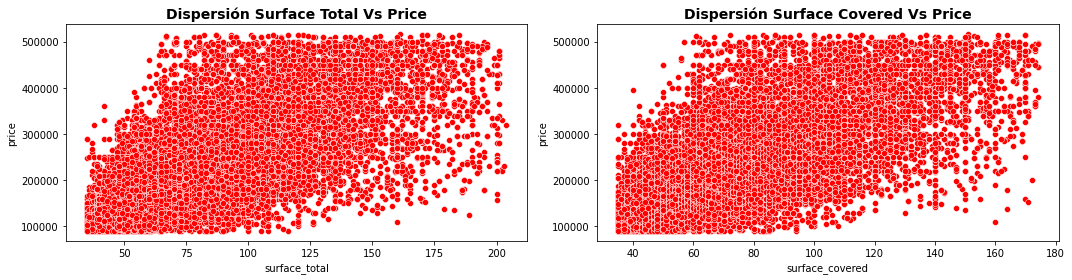

In [ ]:
#En esta sección se buscará graficar las variables contra precio para advertir potencial correlación
#Filtramos el dataset para graficar solo valores de departamentos:
prop_f2_dpto = prop_f2[prop_f2['property_type'] == 'Departamento']

plt.figure(figsize=(18,4),)
plt.subplot(1,3,1)
ax1 = sns.scatterplot(x=prop_f2_dpto['rooms'], y=prop_f2_dpto['price'], color='r')
ax1.set_title('Dispersión Rooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,3,2)
ax2 = sns.scatterplot(x=prop_f2_dpto['bedrooms'], y=prop_f2_dpto['price'], color='r')
ax2.set_title('Dispersión Bedrooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,3,3)
ax3 = sns.scatterplot(x=prop_f2_dpto['bathrooms'], y=prop_f2_dpto['price'], color='r')
ax3.set_title('Dispersión Bathdrooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.figure(figsize=(15,4),)
plt.subplot(1,2,1)
ax4 = sns.scatterplot(x=prop_f2_dpto['surface_total'], y=prop_f2_dpto['price'], color='r')
ax4.set_title('Dispersión Surface Total Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,2,2)
ax5 = sns.scatterplot(x=prop_f2_dpto['surface_covered'], y=prop_f2_dpto['price'], color='r')
ax5.set_title('Dispersión Surface Covered Vs Price', fontweight ="bold", fontsize=14, color="black")

print('Gráficos de precios en función de variables para Departamentos')
plt.tight_layout()
plt.show()

A partir de los gráficos anteriores se puede observar instancias de departamentos en todo el rango de precios del gráfico a medida que aumenta principalmente la cantidad de ambientes, dormitorios y baños de los departamentos. Esto denota ausencia de tendencia para explicar alguna interrelación entre cantidad de ambientes, dormitorios y baños en función de los precios.

En el gráfico de bedrooms Vs precio, se aprecia una leve tendencia de caída de precios a partir de 5 bedrooms inclusive. Cabe aclarar que dicha tendencia no alcanza a explicar algún grado de dependencia de los precios con esta variable.

Para el caso de bathrooms se observa una leve tendencia a incrementar los precios mínimos de departamentos a partir de una cantidad de 3 baños, inclusive. Sin observarse una tendencia determinante contra los precios.

Sí alcanza a observarse algún grado de correlación para los casos de surface_total y surface_covered Vs precio. Se puede apreciar, aunque con gran dispersión, una tendencia a incrementarse los precios de las propiedades, a medida que se incrementa la superficie total y cubierta.

Gráficos de precios en función de variables para PH


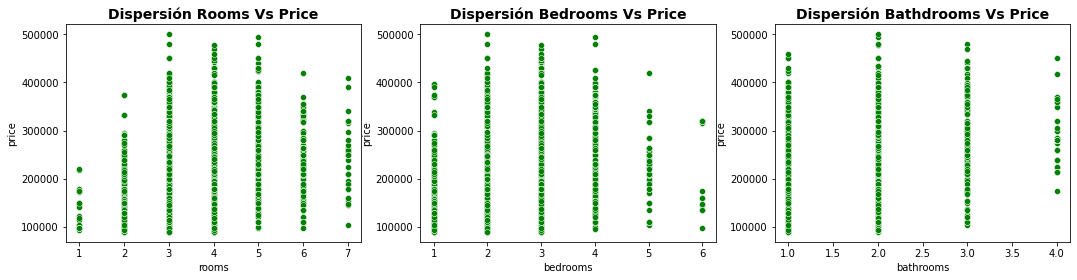

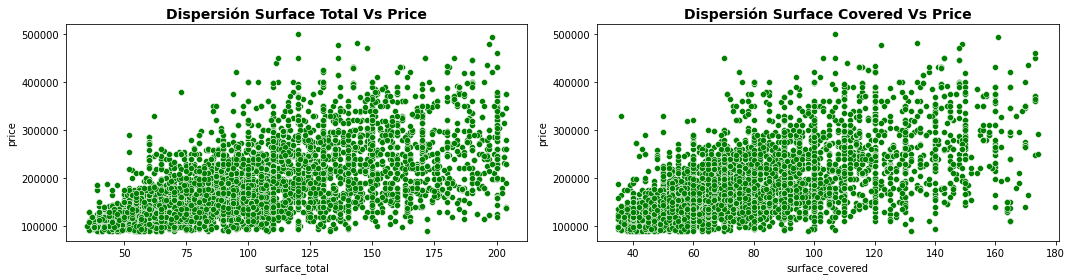

In [ ]:
#En esta sección se buscará graficar las variables contra precio para advertir potencial correlación
#Filtramos el dataset para graficar solo valores de PH:
prop_f2_ph = prop_f2[prop_f2['property_type'] == 'PH']

plt.figure(figsize=(18,4),)
plt.subplot(1,3,1)
ax1 = sns.scatterplot(x=prop_f2_ph['rooms'], y=prop_f2_ph['price'], color='g')
ax1.set_title('Dispersión Rooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,3,2)
ax2 = sns.scatterplot(x=prop_f2_ph['bedrooms'], y=prop_f2_ph['price'], color='g')
ax2.set_title('Dispersión Bedrooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,3,3)
ax3 = sns.scatterplot(x=prop_f2_ph['bathrooms'], y=prop_f2_ph['price'], color='g')
ax3.set_title('Dispersión Bathdrooms Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.figure(figsize=(15,4),)
plt.subplot(1,2,1)
ax4 = sns.scatterplot(x=prop_f2_ph['surface_total'], y=prop_f2_ph['price'], color='g')
ax4.set_title('Dispersión Surface Total Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(1,2,2)
ax5 = sns.scatterplot(x=prop_f2_ph['surface_covered'], y=prop_f2_ph['price'], color='g')
ax5.set_title('Dispersión Surface Covered Vs Price', fontweight ="bold", fontsize=14, color="black")

print('Gráficos de precios en función de variables para PH')
plt.tight_layout()
plt.show()

Para el caso del grupo de gráficos de arriba, correspondientes a las variables de propiedades tipo PH Vs precio, se puede apreciar para el caso de rooms, bedrooms y bathrooms Vs precio, un incremento de precios hasta 3 a 4 rooms y bedrooms, seguido de una caída de precios para cantidades mayores de rooms y bedrooms mencionada.

Al observar el gráfico de dispersión para baños Vs precio, se aprecia similar comportamiento a partir de cantidad 2 baños, con el agregado de un moderado incremento de los precios mínimos.

Al igual que para los casos de casas y departamentos, las propiedades tipo PH muestran cierta tendencia de incremento de precios, con apreciable dispersión, al incrementarse la superficie total y cubierta.

De los gráficos de dispersión observados se desprende que las variables que mejor correlación parecen tener contra los precios serían: surface_total y surface_covered.

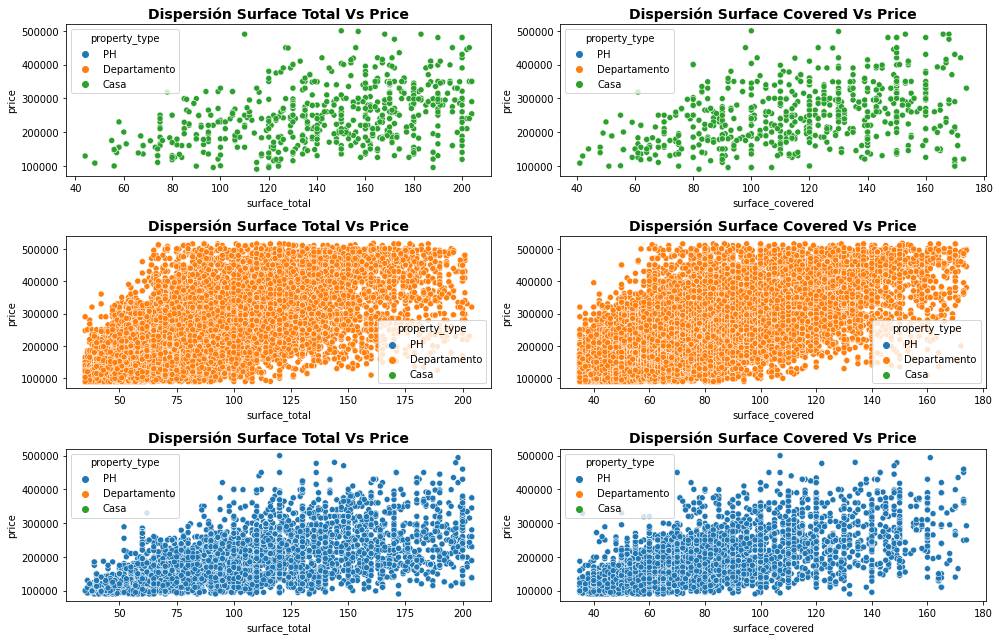

In [ ]:
#A continuación se colocan juntas las graficas de variables surface_total y surface_covered para cada tipo de propiedad
#Casa = prop_f2_casa[prop_f2_casa['property_type']]

plt.figure(figsize=(14,9),)
plt.subplot(3,2,1)
ax1 = sns.scatterplot(x=prop_f2_casa['surface_total'], y=prop_f2_casa['price'], hue= prop_f2['property_type'])
ax1.set_title('Dispersión Surface Total Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(3,2,2)
ax2 = sns.scatterplot(x=prop_f2_casa['surface_covered'], y=prop_f2_casa['price'], hue= prop_f2['property_type'])
ax2.set_title('Dispersión Surface Covered Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(3,2,3)
ax3 = sns.scatterplot(x=prop_f2_dpto['surface_total'], y=prop_f2_dpto['price'], color='r', hue= prop_f2['property_type'])
ax3.set_title('Dispersión Surface Total Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(3,2,4)
ax4 = sns.scatterplot(x=prop_f2_dpto['surface_covered'], y=prop_f2_dpto['price'], color='r', hue= prop_f2['property_type'])
ax4.set_title('Dispersión Surface Covered Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(3,2,5)
ax4 = sns.scatterplot(x=prop_f2_ph['surface_total'], y=prop_f2_ph['price'], color='g', hue= prop_f2['property_type'])
ax4.set_title('Dispersión Surface Total Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.subplot(3,2,6)
ax5 = sns.scatterplot(x=prop_f2_ph['surface_covered'], y=prop_f2_ph['price'], color='g', hue= prop_f2['property_type'])
ax5.set_title('Dispersión Surface Covered Vs Price', fontweight ="bold", fontsize=14, color="black")

plt.tight_layout()
plt.show()

De acuerdo a la descripción de los gráficos de dispersión realizada para las distintas variables Vs precio, agrupamos, en el conjunto de arriba, los gráficos de superficie total y cubierta para los tres tipos de propiedades más numerosas del dataset properati (Casa, Departamento, PH).

### 2.1.7. **Correlaciones:** 

Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

#### 2.1.7.1.       En primer lugar calculamos la correlación de todo el dataset 
filtrado, prop_f2.




In [ ]:
prop_corr = prop_f2.corr()
prop_corr

rooms  bedrooms  ...  surface_covered     price
rooms            1.000000  0.944543  ...         0.774613  0.514180
bedrooms         0.944543  1.000000  ...         0.769254  0.502925
bathrooms        0.498750  0.503363  ...         0.611848  0.596195
surface_total    0.716998  0.705283  ...         0.905357  0.683999
surface_covered  0.774613  0.769254  ...         1.000000  0.713436
price            0.514180  0.502925  ...         0.713436  1.000000

[6 rows x 6 columns]

En consonancia con los comentarios realizados a partir de las observaciones de los gráficos de interrelación o dispersión entre variables y precio del apartado anterior, el cálculo de correlación para el dataset filtrado para los tres principales tipos de propiedades arroja mejor correlación para las variables surface_total y surface_covered Vs precio, y menor correlación para el resto de las variables.

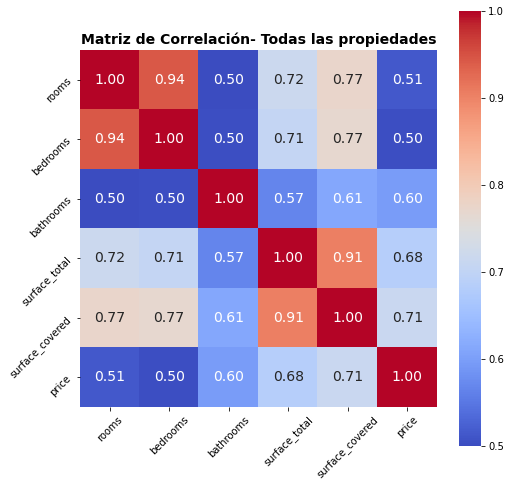

In [ ]:
#Se hace la matriz de correlación para los 3 tipos de porpiedades:

#corr = data.drop(columns = 'species').corr()
plt.figure(figsize=(8,8))
ax3 = sns.heatmap(prop_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 14},
           #xticklabels= data.drop(columns = 'species').columns, 
           #yticklabels= data.drop(columns = 'species').columns,
           cmap= 'coolwarm', vmin=0.5, vmax=1)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
ax3.set_title('Matriz de Correlación- Todas las propiedades', fontweight ="bold", fontsize=14, color="black")

plt.show()

7.2.    Se procede ahora a evaluar correlación para los distintos tipos de propiedad

In [ ]:
#Correlación de variables para casas:
prop_corr_casa = prop_f2_casa.corr()
prop_corr_casa

rooms  bedrooms  ...  surface_covered     price
rooms            1.000000  0.828817  ...         0.465836  0.305455
bedrooms         0.828817  1.000000  ...         0.454389  0.254335
bathrooms        0.271908  0.281344  ...         0.257715  0.329260
surface_total    0.415022  0.390281  ...         0.684547  0.429940
surface_covered  0.465836  0.454389  ...         1.000000  0.394442
price            0.305455  0.254335  ...         0.394442  1.000000

[6 rows x 6 columns]

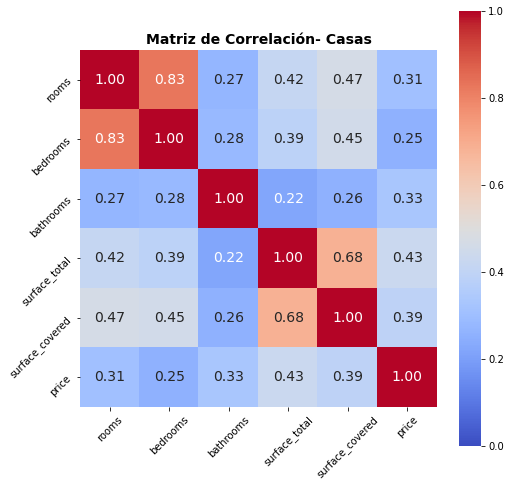

In [ ]:
#En esta ocasión es el turno de representar la matriz de correlación para las casas:

plt.figure(figsize=(8,8))
ax3 = sns.heatmap(prop_corr_casa, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 14},
           #xticklabels= data.drop(columns = 'species').columns, 
           #yticklabels= data.drop(columns = 'species').columns,
           cmap= 'coolwarm', vmin=0, vmax=1)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
ax3.set_title('Matriz de Correlación- Casas', fontweight ="bold", fontsize=14, color="black")

plt.show()

In [ ]:
#Correlación de variables para departamentos:
prop_corr_dpto = prop_f2_dpto.corr()
prop_corr_dpto

rooms  bedrooms  ...  surface_covered     price
rooms            1.000000  0.944010  ...         0.775294  0.530859
bedrooms         0.944010  1.000000  ...         0.771589  0.519132
bathrooms        0.513901  0.520218  ...         0.642444  0.610227
surface_total    0.718708  0.713433  ...         0.924077  0.748847
surface_covered  0.775294  0.771589  ...         1.000000  0.751612
price            0.530859  0.519132  ...         0.751612  1.000000

[6 rows x 6 columns]

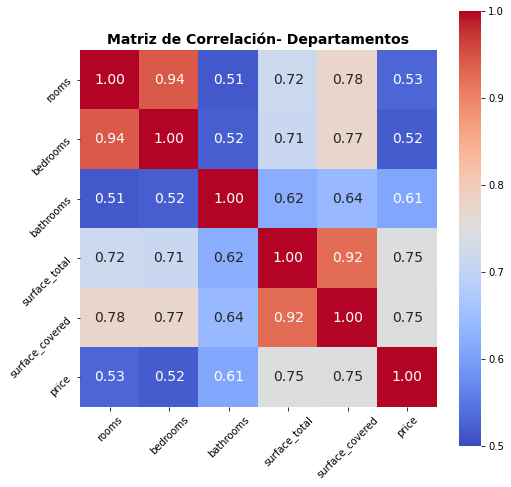

In [ ]:
#En esta ocasión es el turno de representar la matriz de correlación para departamentos:

plt.figure(figsize=(8,8))
ax3 = sns.heatmap(prop_corr_dpto, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 14},
           #xticklabels= data.drop(columns = 'species').columns, 
           #yticklabels= data.drop(columns = 'species').columns,
           cmap= 'coolwarm', vmin=0.5, vmax=1)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
ax3.set_title('Matriz de Correlación- Departamentos', fontweight ="bold", fontsize=14, color="black")

plt.show()

In [ ]:
#Correlación de variables para PH:
prop_corr_ph = prop_f2_ph.corr()
prop_corr_ph

rooms  bedrooms  ...  surface_covered     price
rooms            1.000000  0.938428  ...         0.715270  0.526511
bedrooms         0.938428  1.000000  ...         0.708419  0.519202
bathrooms        0.463131  0.456673  ...         0.552395  0.513544
surface_total    0.622724  0.589649  ...         0.802528  0.596416
surface_covered  0.715270  0.708419  ...         1.000000  0.686353
price            0.526511  0.519202  ...         0.686353  1.000000

[6 rows x 6 columns]

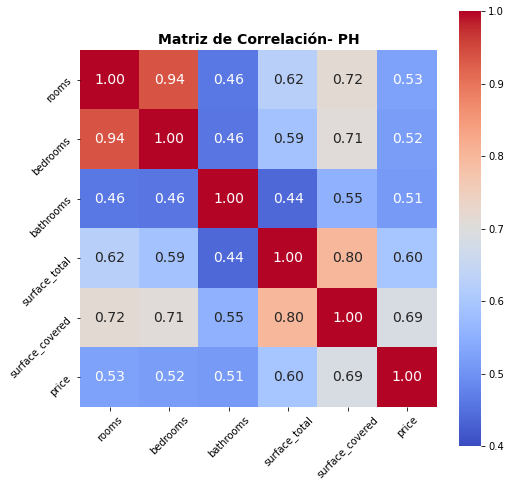

In [ ]:
#En esta ocasión es el turno de representar la matriz de correlación para PH:

plt.figure(figsize=(8,8))
ax3 = sns.heatmap(prop_corr_ph, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 14},
           #xticklabels= data.drop(columns = 'species').columns, 
           #yticklabels= data.drop(columns = 'species').columns,
           cmap= 'coolwarm', vmin=0.4, vmax=1)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
ax3.set_title('Matriz de Correlación- PH', fontweight ="bold", fontsize=14, color="black")

plt.show()

De la observación de los parámetros de correlación presentados, se destacan los departamentos y PH con una mayor correlación (en el orden de 0.7 y 0.6 respectivamente) y las casas con una correlación menor de precio en función de las superficies total y cubierta, en torno a 0.4.

## 2.2 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### 2.2.1 Pregunta: ¿Hay alguna variación de precios relativa apreciable en función de la fecha de comienzo de publicación para los inmuebles?

In [ ]:
# Importando dataset properati desde ubicación de DRIVE
properati = pd.read_csv('/content/drive/MyDrive/Data Science/Sprint Project 1/DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
# Se trata de identificar si hay algún patrón en relación con la fecha de publicación del inmueble, para advertir un cambio de valuación que pueda
# ser estacional

# Explorando el límite superior de fechas de fin de publicación

print('''Explorando el valor máximo de fechas de fin de publicación, 'end_date'
''')
print('Valor máximo, fecha fin de publicación: ', prop_checkpoint['end_date'].max(), '''
''')

# Se eliminan las fechas que se encuentren por fuera del rango 2000- 2021
properati_end_date = prop_checkpoint.loc[(prop_checkpoint['end_date'].between('2000','2021'))]

# Explorando el límite inferior de fechas de comienzo de publicación: 'start_date':

print('''Explorando el valor mínimo de fechas de comienzo de publicación, 'start_date'
''')
print('Valor mínimo, fecha comienzo de publicación: ', prop_checkpoint['end_date'].min(), '''
''')

# Se eliminan las fechas que se encuentren por fuera del rango 2000- 2021

properati_start_date = prop_checkpoint.loc[(prop_checkpoint['start_date'].between('2000','2021'))]

# Generando una array con el intervalo de fechas inicio-fin, en intervalos mensuales

#print('Generando una array con el intervalo de fechas inicio-fin, en intervalos mensuales')
#date_index = pd.date_range(start = '2019-1-1',end='2020-1-25', freq='M')
#print(date_index)

Explorando el valor máximo de fechas de fin de publicación, 'end_date'

Valor máximo, fecha fin de publicación:  9999-12-31 

Explorando el valor mínimo de fechas de comienzo de publicación, 'start_date'

Valor mínimo, fecha comienzo de publicación:  2019-01-04 



In [ ]:
# Se convierte la columna start_date en tipo de datos datetime64[ns]

properati_start_date["start_date"]=pd.to_datetime(properati_start_date["start_date"])
properati_start_date.info()

# Se convierte la columna end_date en tipo de datos datetime64[ns]

properati_end_date["end_date"]=pd.to_datetime(properati_end_date["end_date"])
properati_end_date.info()

# Además, ordenamos las filas según la fecha start_date

df = properati_start_date.sort_values(by=['start_date'])
df1 = properati_end_date.sort_values(by=['end_date'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91485 entries, 0 to 146556
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date       91485 non-null  datetime64[ns]
 1   end_date         91485 non-null  object        
 2   created_on       91485 non-null  object        
 3   lat              86951 non-null  float64       
 4   lon              86937 non-null  float64       
 5   l1               91485 non-null  object        
 6   l2               91485 non-null  object        
 7   l3               91485 non-null  object        
 8   rooms            91485 non-null  float64       
 9   bedrooms         91485 non-null  float64       
 10  bathrooms        89314 non-null  float64       
 11  surface_total    82568 non-null  float64       
 12  surface_covered  82250 non-null  float64       
 13  price            91485 non-null  float64       
 14  currency         91485 non-null  obje

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Investigando si hay algún patrón de precios en relación a la fecha de comienzo de publicación de cada inmueble, mediante gráficos de dispersión:

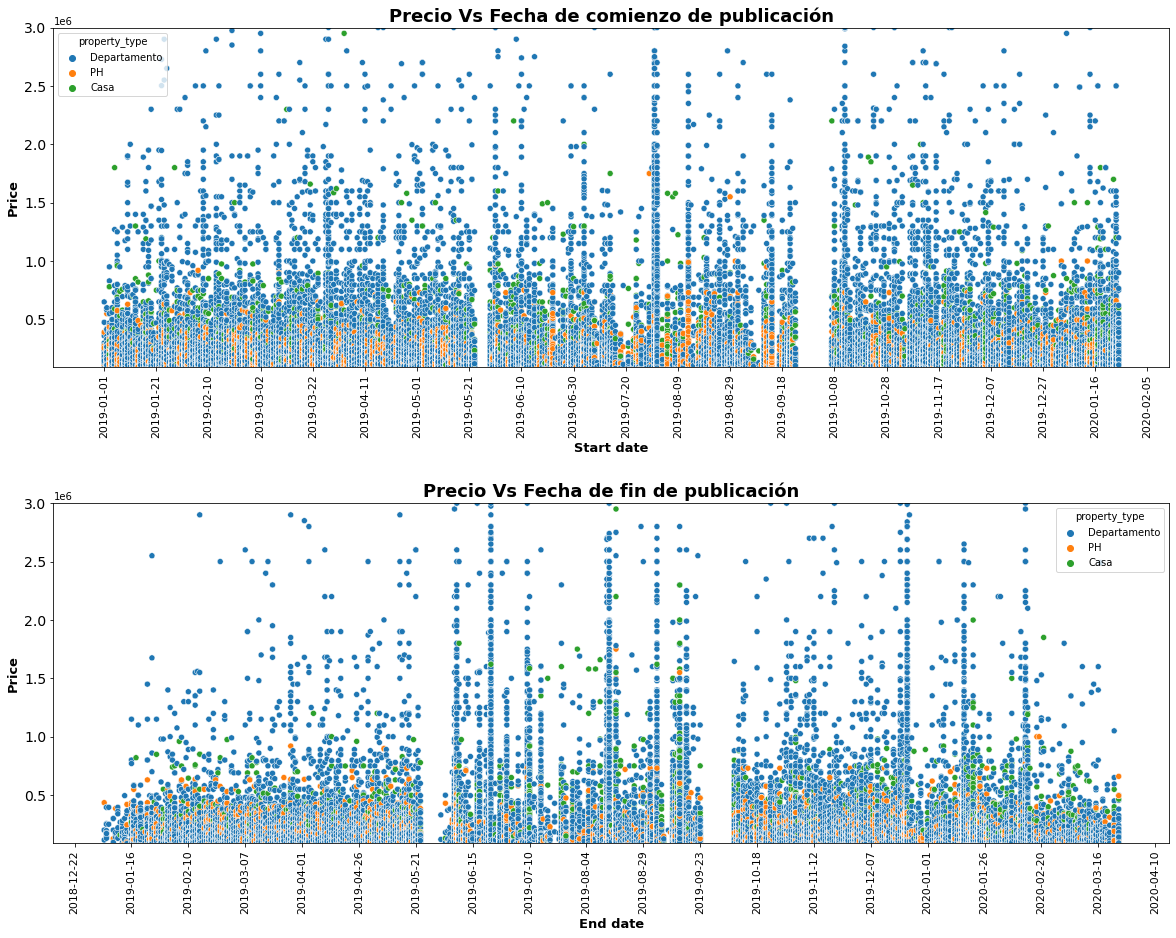

In [ ]:
# Se crea la figura
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=.4)

# Se crea el plot para visualizar la evolución de los precios en función de la fecha de comienzo de publicación de las propiedades:
ax2 = plt.subplot(2,1,1)
sns.scatterplot(x= df['start_date'], y= df['price'], hue= df['property_type'])
ax2.set_title('Precio Vs Fecha de comienzo de publicación', fontweight ="bold", fontsize=18, color="black")
ax2.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('start date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax2.set_ylim([90000,3000000])

# Se crea el plot para visualizar la evolución de los precios en función de la fecha de fin de publicación de las propiedades:
ax1 = plt.subplot(2,1,2)
ax1 = sns.scatterplot(x=df1['end_date'], y= df1['price'], hue= df1['property_type'])
ax1.set_title('Precio Vs Fecha de fin de publicación', fontweight ="bold", fontsize=18, color="black")
ax1.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('end date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax1.set_ylim([90000,3000000])

plt.show()

A continuación se hacen gráficos de dispersión de precio Vs fecha de inicio de publicación, y precio Vs fecha fin de publicación, para cada tipo de propiedad (Casa, Departamento, PH).

Investigando si hay algún patrón de precios en relación a la fecha de comienzo y fin de publicación de casas:

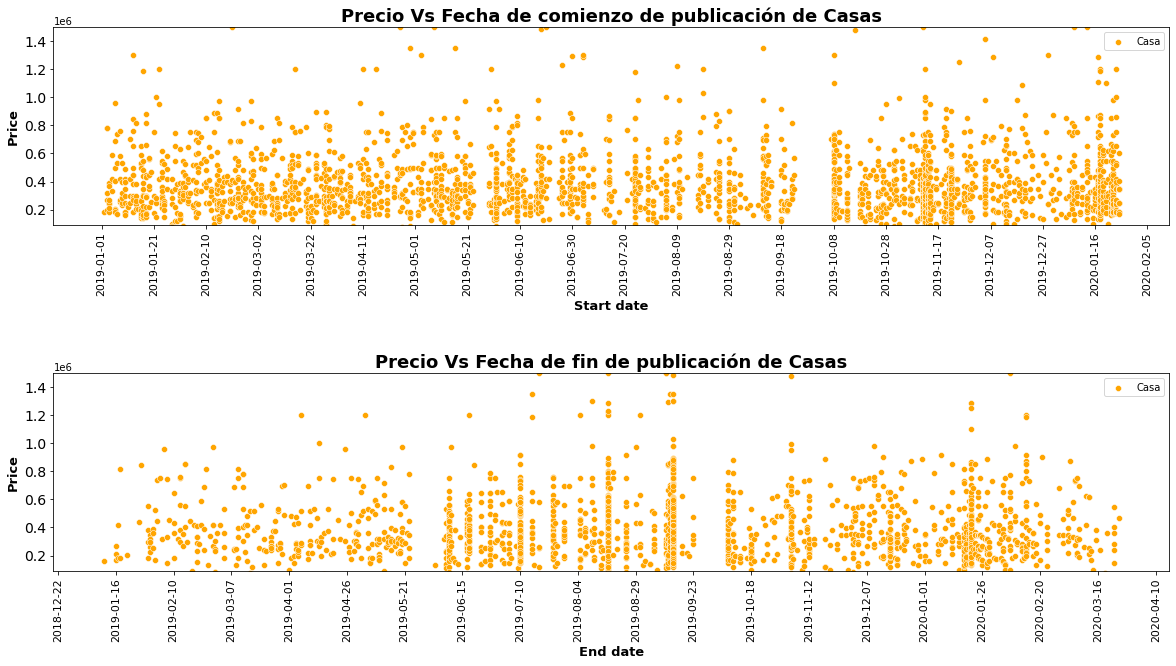

In [ ]:
# Se filtra el dataset para obtener solo los tipos de propiedad: Casa

# Ingresar el tipo de propiedad a estudiar:
tipo = 'Casa'
data = df[df['property_type'] == tipo]
data1 = df1[df1['property_type'] == tipo]

# Se crea la figura

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.75)

# Se crean los plots

ax1 = plt.subplot(2,1,1)
sns.scatterplot(x= data['start_date'], y=data['price'], color='orange', label=tipo)
ax1.set_title('Precio Vs Fecha de comienzo de publicación de Casas', fontweight ="bold", fontsize=18, color="black")
ax1.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('start date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax1.set_ylim([90000,1500000])

ax2 = plt.subplot(2,1,2)
sns.scatterplot(x=data1['end_date'], y= data1['price'], color='orange', label=tipo)
ax2.set_title('Precio Vs Fecha de fin de publicación de Casas', fontweight ="bold", fontsize=18, color="black")
ax2.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('end date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax2.set_ylim([90000,1500000])

plt.show()

Investigando si hay algún patrón de precios en relación a la fecha de comienzo y fin de publicación de Departamento:

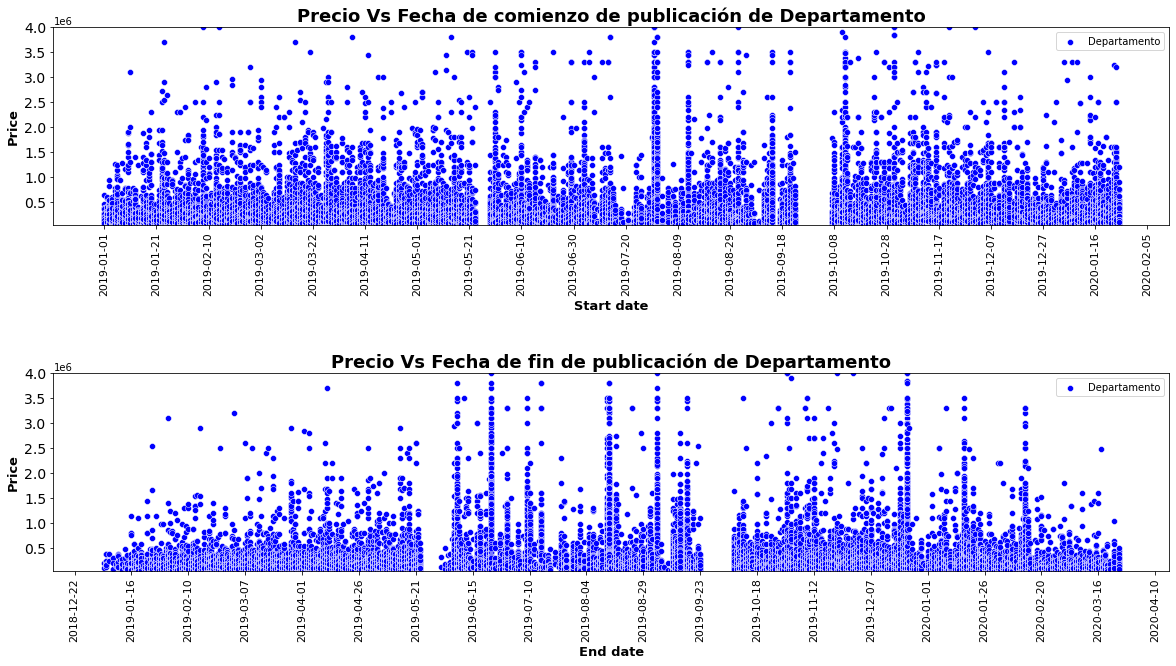

In [ ]:
# Se filtra el dataset para obtener solo los tipos de propiedad: Departamento

# Ingresar el tipo de propiedad a estudiar:
tipo = 'Departamento'
data = df[df['property_type'] == tipo]
data1 = df1[df1['property_type'] == tipo]

# Se crea la figura

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.75)

# Se crean los plots

ax1 = plt.subplot(2,1,1)
sns.scatterplot(x= data['start_date'], y= data['price'], label= 'Departamento', color='blue')
ax1.set_title('Precio Vs Fecha de comienzo de publicación de Departamento', fontweight ="bold", fontsize=18, color="black")
ax1.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('start date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax1.set_ylim([50000,4000000])

ax2 = plt.subplot(2,1,2)
sns.scatterplot(x=data1['end_date'], y= data1['price'], label= 'Departamento', color='blue')
ax2.set_title('Precio Vs Fecha de fin de publicación de Departamento' , fontweight ="bold", fontsize=18, color="black")
ax2.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('end date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax2.set_ylim([50000,4000000])

plt.show()

Investigando si hay algún patrón de precios en relación a la fecha de comienzo y fin de publicación de PH:

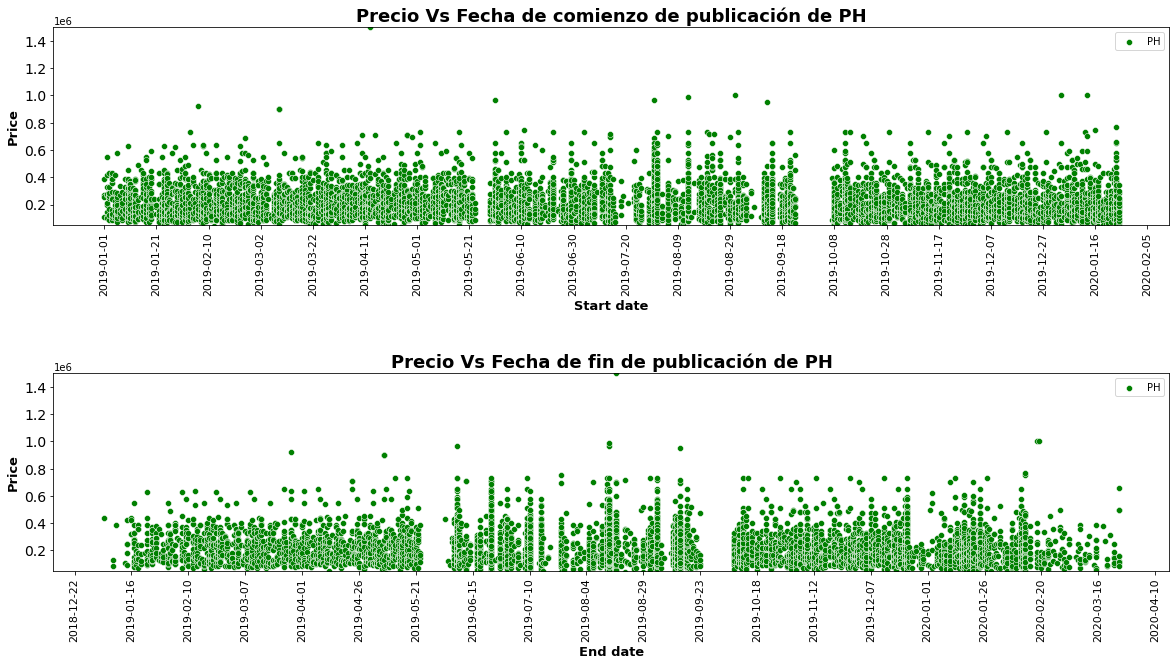

In [ ]:
# Se filtra el dataset para obtener solo los tipos de propiedad: PH

# Ingresar el tipo de propiedad a estudiar:
tipo = 'PH'
data = df[df['property_type'] == tipo]
data1 = df1[df1['property_type'] == tipo]

# Se crea la figura

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.75)

# Se crean los plots

ax1 = plt.subplot(2,1,1)
sns.scatterplot(x= data['start_date'], y= data['price'], color='green', label=tipo)
ax1.set_title('Precio Vs Fecha de comienzo de publicación de PH', fontweight ="bold", fontsize=18, color="black")
ax1.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('start date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax1.set_ylim([50000,1500000])

ax2 = plt.subplot(2,1,2)
sns.scatterplot(x=data1['end_date'], y= data1['price'], color='green', label=tipo)
ax2.set_title('Precio Vs Fecha de fin de publicación de PH' , fontweight ="bold", fontsize=18, color="black")
ax2.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('end date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax2.set_ylim([50000,1500000])

plt.show()

Relacionar fecha de comienzo y fecha de fin de publicación nos puede entregar información confusa, ya que podría solo haber distinta distribución de datos y ningún patrón útil, en cuanto a variación relativa de precios.

De hecho, se alcanza a observar, sobre todo en casas y departamentos, una mayor cantidad de instancias hacia las fechas de inicio de publicación cercanas a fin de 2019.

Algo similar se observa para los tipo PH, donde se observa menor cantidad de propiedades hacia las fechas finales de fin de publicación.

Observados los primeros gráficos de dispersión, conteniendo la variedad completa de propiedades (Departamento, Casa y PH), no se alcanza a apreciar alguna tendencia clara de aumento o disminución relativa de precios.

Dicho lo anterior, se procede a continuación a filtrar tipo de propiedad Departamento, cuya superficie cubierta se encuentre en un rango de 95 a 105 m2.
Con este filtrado lo que se intenta es comparar propiedades con muy similar superficie cubierta, variable cuya correlación con precio es 0.75, según se vió al realizar las distintas matrices de correlación.

In [ ]:
# Voviendo a cargar el dataset y procediendo a realizar el filtrado indicado:
inmuebles = pd.read_csv('/content/drive/MyDrive/Data Science/Sprint Project 1/DS_Proyecto_01_Datos_Properati.csv')

columnas = ["start_date",
            "end_date",
            "rooms", 
            "bedrooms", 
            "bathrooms", 
            "surface_total", 
            "surface_covered", 
            "price"]

In [ ]:
columnas_bm = inmuebles.columns[inmuebles.columns.isin(columnas)]
columnas_bm

Index(['start_date', 'end_date', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price'],
      dtype='object')

In [ ]:
# Filtrado de prueba
inmuebles.loc[((inmuebles["l2"]== "Capital Federal")&
                 (inmuebles["property_type"].isin(["PH","Casa","Departamento"]))&
                 (inmuebles["surface_total"].between(15,1000)) & (inmuebles["price"]<= 4000000)), columnas_bm].dropna().shape

inmuebles.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
# Creando dataset filtrado para evaluar precios en función de fecha de publicación de instancias de 100 m2 de superficie cubierta:
p_df = inmuebles.loc[((inmuebles["l2"]== "Capital Federal") &
                 (inmuebles["property_type"].isin(["Departamento"])) &
                 ((inmuebles["surface_covered"].between(95,105)) & (inmuebles["price"]<= 4000000))), columnas_bm].dropna().reset_index(drop =True)

p_df.head()

start_date    end_date  rooms  ...  surface_total  surface_covered     price
0  2019-10-17  2019-11-19    3.0  ...           99.0             99.0  690000.0
1  2019-10-17  2019-12-23    3.0  ...          100.0            100.0  560000.0
2  2019-10-17  2019-12-23    3.0  ...          100.0            100.0  560000.0
3  2019-10-17  2019-12-23    3.0  ...          100.0            100.0  560000.0
4  2019-10-17  2019-12-23    3.0  ...          100.0            100.0  560000.0

[5 rows x 8 columns]

In [ ]:
# Se convierte la columna start_date en datos tipo datetime64[ns]

p_df["start_date"]=pd.to_datetime(p_df["start_date"])
p_df.info()

# Se ordena el dataset según valores crecientes de fecha start_date:

p_df1 = p_df.sort_values(by=['start_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251 entries, 0 to 3250
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date       3251 non-null   datetime64[ns]
 1   end_date         3251 non-null   object        
 2   rooms            3251 non-null   float64       
 3   bedrooms         3251 non-null   float64       
 4   bathrooms        3251 non-null   float64       
 5   surface_total    3251 non-null   float64       
 6   surface_covered  3251 non-null   float64       
 7   price            3251 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 203.3+ KB


In [ ]:
# Se eliminan las fechas que se encuentren por fuera del rango 2000- 2021

p_df2 = p_df.loc[(p_df['end_date'].between('2000','2021'))]

# Se convierte la columna end_date en datos tipo datetime64[ns]

p_df2["end_date"]=pd.to_datetime(p_df2["end_date"])
p_df2.info()

# Se ordena el dataset según valores crecientes de fecha end_date:

p_df3 = p_df2.sort_values(by=['start_date'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3250
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date       3095 non-null   datetime64[ns]
 1   end_date         3095 non-null   datetime64[ns]
 2   rooms            3095 non-null   float64       
 3   bedrooms         3095 non-null   float64       
 4   bathrooms        3095 non-null   float64       
 5   surface_total    3095 non-null   float64       
 6   surface_covered  3095 non-null   float64       
 7   price            3095 non-null   float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 217.6 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



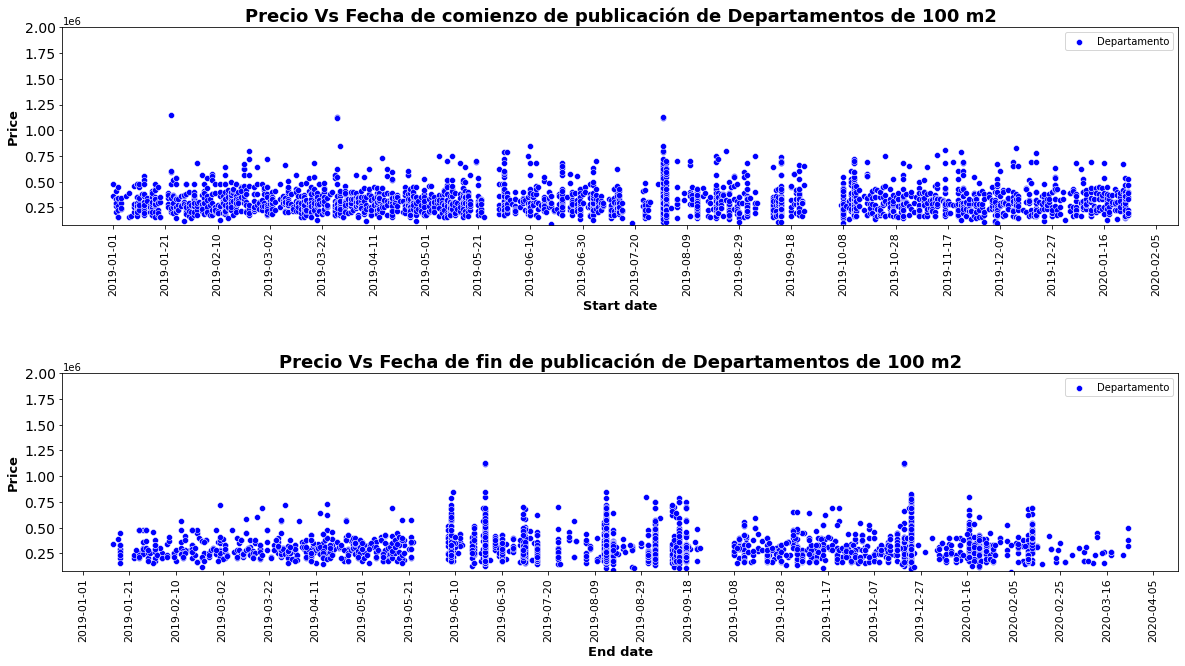

In [ ]:
# Se grafica un scatter plot de departamentos de 100 m2 Vs precio:

# Se crea la figura

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.75)

# Se crean los plots

ax1 = plt.subplot(2,1,1)
sns.scatterplot(x= p_df1['start_date'], y= p_df1['price'], label= 'Departamento', color='blue')
ax1.set_title('Precio Vs Fecha de comienzo de publicación de Departamentos de 100 m2', fontweight ="bold", fontsize=18, color="black")
ax1.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('start date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax1.set_ylim([80000,2000000])

ax2 = plt.subplot(2,1,2)
sns.scatterplot(x=p_df3['end_date'], y= p_df3['price'], label= 'Departamento', color='blue')
ax2.set_title('Precio Vs Fecha de fin de publicación de Departamentos de 100 m2' , fontweight ="bold", fontsize=18, color="black")
ax2.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(fontsize=11, color="black", rotation=90)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel('end date'.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Price', fontsize=13, fontweight ="bold")
ax2.set_ylim([80000,2000000])

plt.show()

En los gráficos de dispersión de arriba, correspondientes a Departamentos de 100 m2, no alcanza a distinguirse un patrón de comportamiento de precios a lo largo del año.

Por lo observado en distintos tipos de propiedades, y particularmente para el caso de departamentos de 100 m2, no se alcanza a apreciar ningún patrón de precios que indique algún tipo de variación relativa de los mismos a lo largo del tiempo de comienzo de publicación para cada instancia observada.

## 3.0 Machine Learning


En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### 3.0.1 SELECCIÓN DE MÉTRICA DE EVALUACIÓN DEL MODELO

El presente trabajo demanda la predicción de la variable precio, para las propiedades del dataset. Esta variable, por las características y cantidad de las instancias, resulta ser una variable contínua. Por otro lado, el comportamiento entre los atributos del dataset y la variable a predecir configura una regresión, por lo tanto será un modelo de regresión el que explique la solución del caso.

Existen diversas métricas para la evaluación de un modelo de regresión, en este caso se seleccionará:

*   R2-ajustado

**R2 y R2-ajustado**

La métrica R2 explica cuan bien la varianza de la predicción explica la varianza de la variable dependiente del dataset. La métrica R2 está representada por la siguiente ecuación:

R2 = 1 - [Σ (Yi - Ŷ)^2 / Σ (Yi - ȳ)^2],

donde:


-   Yi: Variable dependiente del data set. Es la variable a predecir con el modelo.
-   Ŷ: Predicción del modelo.

-   ȳ: Promedio de Yi.

De la ecuación se desprende que que R2 arrojará valores entre 0 y 1. Los valores más cercanos a 1 explican mejor el desempeño del modelo.
La particularidad que tiene esta métrica es que arroja valores mayores a medida que se agregan atributos al dataset, contribuyan estos o no a la predicción del modelo. Para tener en cuenta esto, se introduce la métrica R2-ajustado.

**R2-ajustado**

La métrica R2-ajustado evalúa la variación en la variable dependiente, explicada por los atributos que más aportan a las predicciones. A diferencia de R2, R2-ajustado penaliza el modelo por el agregado de atributos que no aportan a las predicciones. La fórmula de R2-ajustado es:

R2 = 1 – ((1-R^2) N-1 / (N-M-1))

-   N: número de instancias.
-   M: número de columnas o atributos

Por lo expuesto, los valores de R2-ajustado serán menores o iguales a R2, pudiendo obtener un valor máximo de 1, cuando el modelo explique perfectamente los datos.

**Se tendrá en cuenta además la métrica:**

*   RMSE (Root Mean Squared Error) o MSE, como métrica secundaria, a los fines de considerar sus resultados, sobre todo en los subconjuntos train y test y las diferencias que se logren apreciar.

Esta métrica corresponde al cálculo del promedio del cuadrado de las diferencias entre el valor predicho y el valor de la variable dependiente, es por tanto un cálculo del error existente entre las predicciones y el valor real de la variable dependiente del dataset. Se desprende entonces que mientras mayor sea el valor de MSE, peor se desempeña el modelo en relación a los datos y viceversa.

La fórmula de MSE es:

MSE = 1 / N * sum for i to N (y_i – yhat_i)^2

donde:
-   N: número de filas o instancias
-   y_i: variable dependiente
-   yhat_i: valores de las predicciones del modelo

RMSE difiere de MSE sólo por el cálculo de raíz cuadrada de MSE, de esta manera se obitenen valores en la misma unidad que la variable a predecir, lo cual aporta más fácilmente una noción de cuan grande es el error, en relación a la variable dependiente del dataset o la variable a predecir.







---------------------------------------------------------------------------
### 3.1. Tal como dice la recomendación, se vuelve a importar el dataset para luego proceder a filtrarlo.

In [ ]:
# Voviendo a cargar el dataset y procediendo a realizar el filtrado indicado:
inmuebles = pd.read_csv('/content/drive/MyDrive/Data Science/Sprint Project 1/DS_Proyecto_01_Datos_Properati.csv')

columnas = ["rooms", 
            "bedrooms", 
            "bathrooms", 
            "surface_total", 
            "surface_covered", 
            "price"]

In [ ]:
columnas_bm = inmuebles.columns[inmuebles.columns.isin(columnas)]
columnas_bm

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price'],
      dtype='object')

In [ ]:
# Filtrado de prueba
inmuebles.loc[((inmuebles["l2"]== "Capital Federal")&
                 (inmuebles["property_type"].isin(["PH","Casa","Departamento"]))&
                 (inmuebles["surface_total"].between(15,1000)) & (inmuebles["price"]<= 4000000)), columnas_bm].dropna().shape


(81019, 6)

In [ ]:
# Creando dataset indicado para comenzar a trabajar en modelo ML
ml_df = inmuebles.loc[((inmuebles["l2"]== "Capital Federal")&
                 (inmuebles["property_type"].isin(["PH","Casa","Departamento"]))&
                 (inmuebles["surface_total"].between(15,1000)) & (inmuebles["price"]<= 4000000)),  columnas_bm].dropna().reset_index(drop =True
                                                                                                                                         )

In [ ]:
print('Para trabajar con los modelos de Machine Learning se utilizará el dataset: ml_df, cuyo shape es: ', ml_df.shape)

Para trabajar con los modelos de Machine Learning se utilizará el dataset: ml_df, cuyo shape es:  (81019, 6)


### 3.2. Una vez acondicionado el dataset, importamos librerías de Scikit-Learn.
Luego creamos modelos de:  

> 3.2.1. BENCHMARK: regresión lineal.



Modelos a evaluar:  

> 3.2.2. ÁRBOL DE DECISIÓN- REGRESOR.

> 3.2.3. KNN- REGRESOR.
---------------------------------------------------------------

#### 3.2.1. BENCHMARK: regresión lineal.

Se importan librerías y se crea el MODELO BENCHMARK.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

El siguiente paso consiste en crear los atributos y separar la muestra para entrenamiento y prueba del benchmark.

In [ ]:
x1 = ml_df['rooms']
x2 = ml_df['bedrooms']
x3 = ml_df['bathrooms']
x4 = ml_df['surface_total']
x5 = ml_df['surface_covered']
y = ml_df['price']

In [ ]:
X = np.vstack((x1,x2,x3,x4,x5)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


MODELO BENCHMARK.

In [ ]:
# Se crea un modelo de regresión lineal que hará la función de benchmark
linear_model = LinearRegression()

# Se entrena el modelo
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Se imprimen las pendientes y ordenada al origen de la regresión lineal.

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807940959


Se define a continuación la función para graficar los errores (y - y predicho) y gráfico de dispersión de y Vs y predicho para el conjunto de datos de test

In [ ]:
def show_graficos(X_train, X_test, y_train, y_test,modelo):
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    plt.figure(figsize = (15,8))
    plt.suptitle('Histograma de los errores ( y−ypredicho ) y gráfico de dispersión de  y  vs  ypredicho  para el conjunto de test' , fontweight = 'black', fontsize=16)
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 60, label = 'train', color='red')
    sns.distplot(y_test - y_test_pred, bins = 60, label = 'test', color='blue')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.xlabel('Errores', fontsize=14,fontweight = 'black')
    plt.legend()
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)       
    plt.xlabel('Valores reales del precio (UDS)',fontsize=14,fontweight = 'black')
    plt.ylabel('Predicción de los valores del precio (UDS)',fontsize=14,fontweight = 'black')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    #return
    #plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



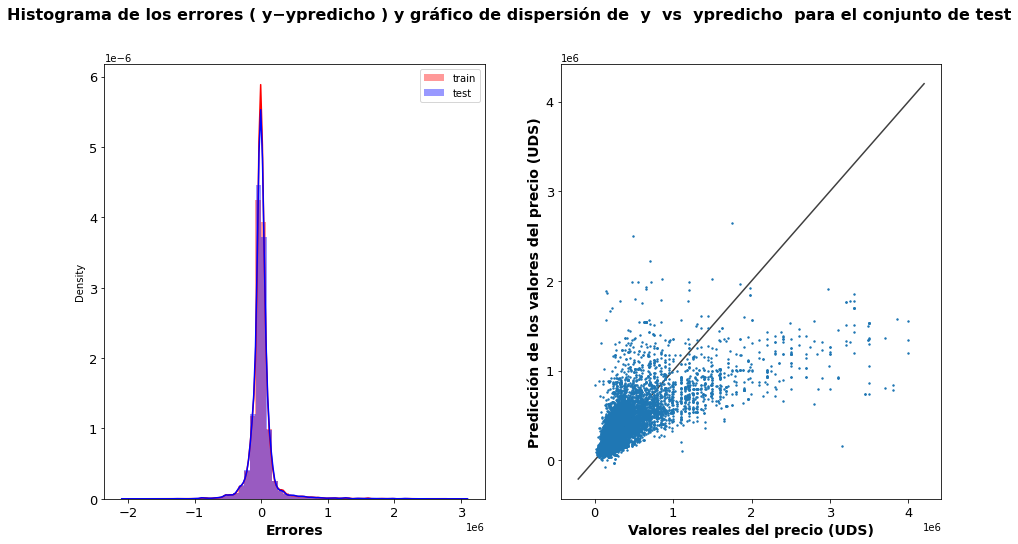

In [ ]:
show_graficos(X_train, X_test, y_train, y_test,linear_model)

Se observa que las distribuciones de train y test para modelo Benchmark arrojan distribuciones muy parecidas, y conformando una distribución muy aproximada a una distribución normal.

Se elige la métrica RMSE para evaluar el desempeño de los modelos.

In [ ]:
print('Modelo BENCHMARK')
#Train
y_train_pred = linear_model.predict(X_train) #Predecimos sobre train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - LINEAR MOD Regresión - y_train predicho:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

#Test
y_test_pred = linear_model.predict(X_test) #Predecimos sobre test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE

print("RMSE - LINEAR MOD Regresión - y_test predicho:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

Modelo BENCHMARK
RMSE - LINEAR MOD Regresión - y_train predicho: 199173.83
RMSE - LINEAR MOD Regresión - y_test predicho: 202449.37


El modelo se evalúa además con r-squared y adj r-squared.

In [ ]:
print('Modelo BENCHMARK')
yhat = linear_model.predict(X)
#tree_regressor
#knn_regressor
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r2: ', r_squared)
print('r2-ajustado: ', adjusted_r_squared)

Modelo BENCHMARK
r2:  0.5516961159355622
r2-ajustado:  0.5516684472969446


#### 3.2.2. ÁRBOL DE DECISIÓN- REGRESOR

Creación, entrenamiento y graficación de los errores de 'train' y 'test', y y-predicho Vs y-real, para el modelo árbol de decisión.
Como primera aproximación, se define la máxima profundidad = 2.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



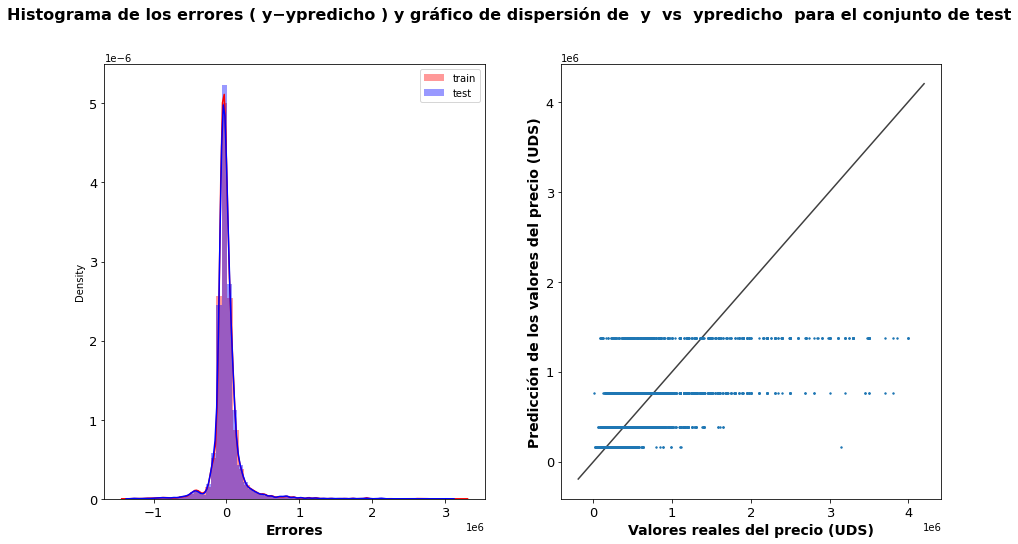

In [ ]:
# Declaramos la función DecisionTreeRegressor y la entrenamos
tree_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_regressor.fit(X_train, y_train)

# Visualizamos gráficos de errores para árbol de decisión
show_graficos(X_train, X_test, y_train, y_test,tree_regressor)

El modelo árbol de decisión con profundidad máxima 2, muestra distribuciones similares para train y test, con valores muy parecidos, y conformando una distribución muy aproximada a una normal.

Se calcula RMSE y r2 para evaluar el MODELO ÁRBOL DE DECISIÓN, con profundidad máxima = 2.

RMSE:


In [ ]:
print('Modelo ÁRBOL DE DECISIÓN')
#Train
y_train_pred = tree_regressor.predict(X_train) #Predecimos sobre train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - DT Regresión - y_train:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

#Test
y_test_pred = tree_regressor.predict(X_test) #Predecimos sobre test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE
print("RMSE - DT Regresión - y_test:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

Modelo ÁRBOL DE DECISIÓN
RMSE - DT Regresión - y_train: 206608.36
RMSE - DT Regresión - y_test: 209013.62


Se evalúa el coeficiente r-squared y adj r-squared, para el modelo de árbol de decisión, con profundidad máxima = 2:

In [ ]:
yhat = tree_regressor.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5190000690992735 0.5189703825100285


En principio, al observar los valores de RMSE para train y test, se puede inferir que hay cierta consistencia entre sus valores, ya que no difieren demasiado, cuantitativamente. Es decir que el modelo hace predicciones con similar precisión para la muestra train que para test, para profundidad máxima = 2.

A continuación se imprime el esquema del árbol obtenido:

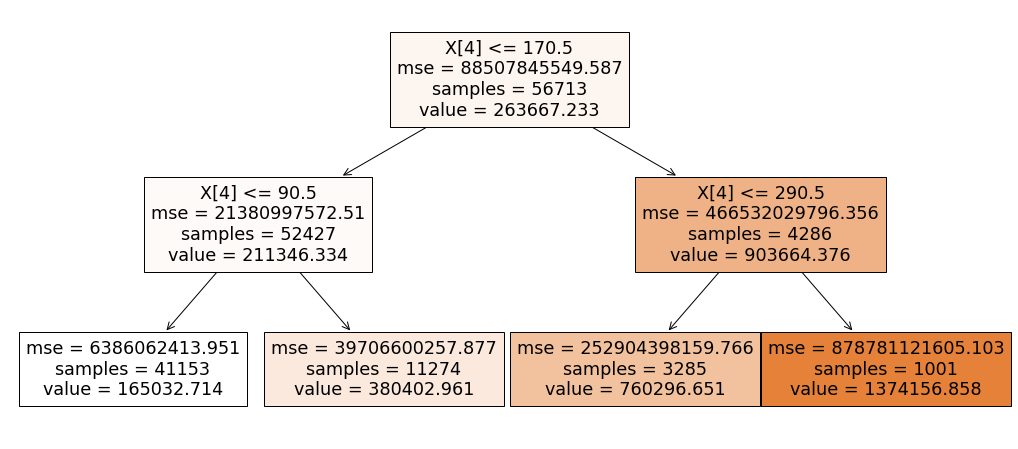

In [ ]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (18,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

#### 3.2.3. KNN- REGRESOR.

Se crea el modelo KNN, se  entrena y posteriormente se grafican los errores 'y-train' Vs 'y-test', y además el error y-predicho Vs y-real.

Como una primera aproximación, se define el modelo para 1 vecino.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



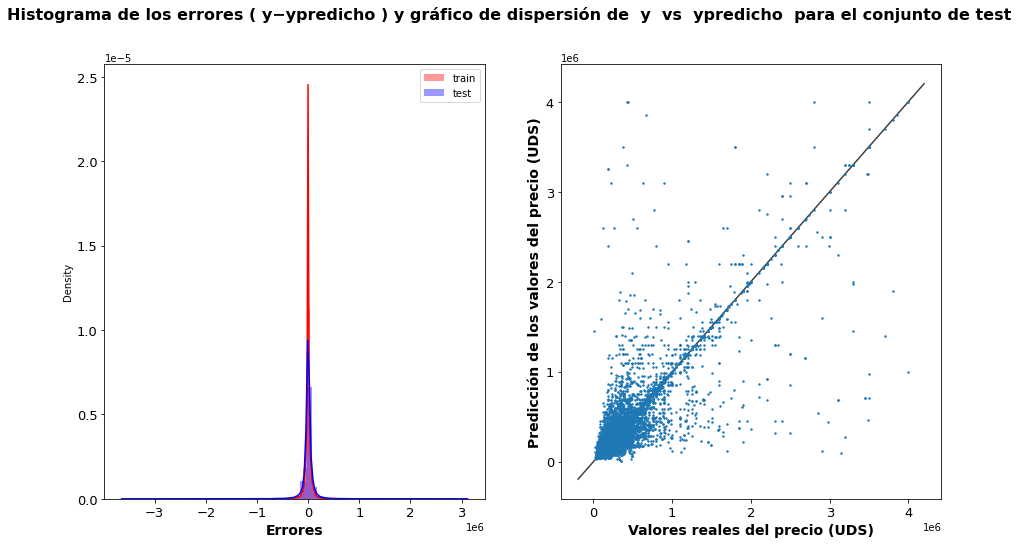

In [ ]:
# Declaramos la función KNeighborsRegressor y la entrenamos
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train, y_train)

# Visualizamos gráficos de errores para KNN
show_graficos(X_train, X_test, y_train, y_test,knn_regressor)

Se evalúa el modelo calculando error RMSE, para MODELO KNN.

In [ ]:
print('Modelo KNN- 1 vecino:')
#Train
y_train_pred = knn_regressor.predict(X_train) #Predecimos sobre train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - KNN Regresión - y_train:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

#Test
y_test_pred = knn_regressor.predict(X_test) #Predecimos sobre test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE
print("RMSE - KNN Regresión - y_test:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

Modelo KNN- 1 vecino:
RMSE - KNN Regresión - y_train: 77925.76
RMSE - KNN Regresión - y_test: 161757.06


Se calcula además el error, r-squared y adj r-squared, para el modelo KNN:

In [ ]:
yhat = knn_regressor.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r2: ', r_squared)
print('r2-ajustado: ', adjusted_r_squared)

r2:  0.8646034823140449
r2-ajustado:  0.8645951258454728


De acuerdo a los valores obtenidos de error RMSE en contraste con r2 y r2 ajustado, se ve una diferencia apreciable de error en la predicción de la muestra train (RMSE = 77925) y test (RMSE = 161757), respectivamente. Esto nos habla de un probable overfitting para la muestra train, que no predeciría satisfactoriamente a la muestra test, a pesar de que r2 arroja un valor superior a 0.85.

A continuación evaluaremos RMSE para ÁRBOL DE DECISIÓN y KNN, barriendo un cierto rango de cantidad de vecinos y profundidad máxima del árbol, para evaluar su desempeño.

### 3.3. Mejora de desempeño de los modelos

> ÁRBOL DE DECISIÓN. RMSE barriendo cantidad de vecinos de 1 a 25:




Text(0.5, 1.0, 'r2- ajustado para distintos valores de profundidad máxima')

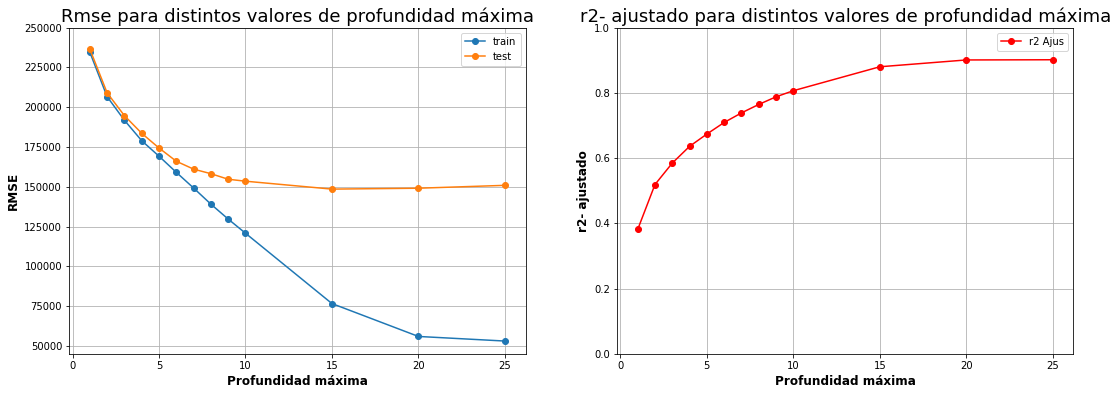

In [ ]:
#Regresión - Árbol de Desición (Para N Profundidades)

lista_rmse_train = []
lista_rmse_test = []
lista_r_train = []
lista_r_adj = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]


for i in max_depths:
    dt_reg_model = DecisionTreeRegressor(max_depth = i)
    dt_reg_model.fit(X_train, y_train)
    y_train_pred = dt_reg_model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = dt_reg_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    yhat = dt_reg_model.predict(X)
    SS_Residual = sum((y-yhat)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    lista_r_train.append(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    lista_r_adj.append(adjusted_r_squared)

plt.figure(figsize = (18,6))
# Creando subplots
plt.subplot(1,2,1)    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.ylim(45000,250000)
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "black")
#Asignando gráfico adicional
plt.subplot(1,2,2)
plt.plot(max_depths, lista_r_adj,'o-', label='r2 Ajus', color='r')

plt.grid(True)
plt.legend()
plt.ylim(0,1)
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("r2- ajustado", fontweight = "black", fontsize = 12)
plt.title("r2- ajustado para distintos valores de profundidad máxima", fontsize = 18, color = "black")

Se puede apreciar en la figura de arriba que a partir de un valor de profundidad máxima de árbol de 7 a 10, comienza a haber una creciente diferencia entre los resultados 'y-train' e 'y-test', mostrando los primeros una tendencia de posible overfitting a partir de profundidad máxima = 15, con valores de RMSE entorno a 50000.
La observación realizada es consistente con el comportamiento de las curvas, ya que mientras los resultados de 'y-train' arrojan menores valores de error con profundidades mayores a las mencionadas, no lo es así para los valores de 'y-test' cuyo error RMSE queda entorno a 150000.
Esto denota que para profundidades del árbol mayores a 10 , no se observan mejores predicciones de precio.
A su vez, se observa que para valores mayores a profundidad máxima 10, los valores r2-ajustado comienzan a mostrar menores gradientes de mejora (por encima de 0.8).

> KNN. RMSE barriendo desde 1 a 25 vecinos:



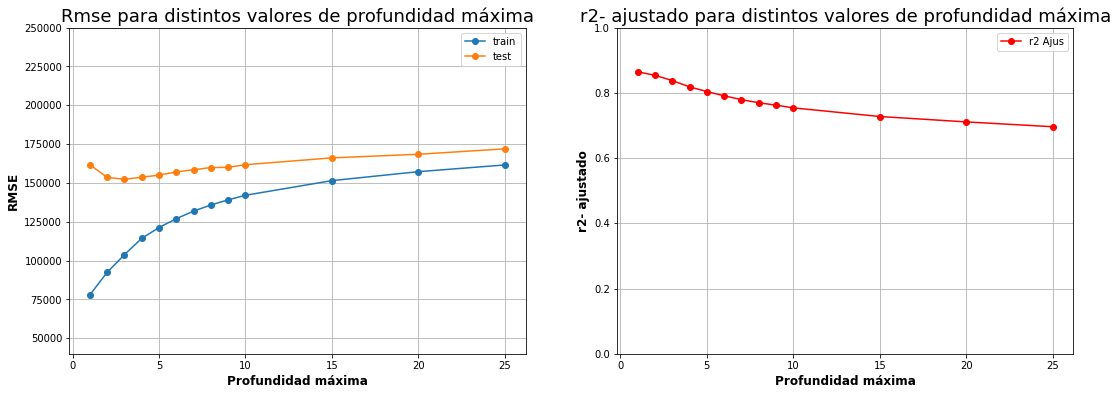

In [ ]:
#Regresión - KNN (Para N Vecinos)

lista_rmse_train = []
lista_rmse_test = []
lista_r_train = []
lista_r_adj = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for k in k_vecinos:
    knn_reg_model = KNeighborsRegressor(n_neighbors= k)
    knn_reg_model.fit(X_train, y_train)
    y_train_pred = knn_reg_model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = knn_reg_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    yhat = knn_reg_model.predict(X)
    SS_Residual = sum((y-yhat)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    lista_r_train.append(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    lista_r_adj.append(adjusted_r_squared)

plt.figure(figsize = (18,6)) 
plt.subplot(1,2,1)   
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.ylim(40000,250000)
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "black")

#Asignando gráfico adicional
plt.subplot(1,2,2)
plt.plot(max_depths, lista_r_adj,'o-', label='r2 Ajus', color='r')

plt.grid(True)
plt.legend()
plt.ylim(0,1)
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("r2- ajustado", fontweight = "black", fontsize = 12)
plt.title("r2- ajustado para distintos valores de profundidad máxima", fontsize = 18, color = "black")

plt.show()

El gráfico de error RMSE muestra errores crecientes a medida que el modelo Knn se evalúa con mayor cantidad de vecinos. Sin embargo, aproximadamente hasta una cantidad de vecinos igual a 10, la diferencia de error RMSE de y-train e y-test va disminuyendo apreciablemente.

En contrapartida, a medida que se va incrementando el número de vecinos, decrece el coeficiente r2 ajustado.

Hay que tener en cuenta además que con cantidad de vecinos igual a 1, el modelo muestra un valor de r2 ajustado igual a 0.85 (lo cual es aceptable), pero dicho hiperparámetro arroja diferencias muy grandes entre RMSE y-train Vs y-test.

Dicho lo anterior, se puede inferir que ajustando la cantidad de vecinos en 5, se aprecia una disminución considerable de diferencia de errores RMSE para y-train Vs y-test, entregando además un r2 ajustado de 0.8.

Una mayor cantidad de vecinos provocará que el coeficiente r2 ajustado siga disminuyendo, inverso a la tendencia a crecer, mostrada por el error RMSE.

Entre los modelos entrenados utilizaría el de KNN.
Para justificar la decisión, primero volvemos a plasmar los valores obtenidos de RMSE y r2 ajustado para ambos modelos, según hiperparámetros ajustados en valores de compromiso:

In [ ]:
# Evaluamos nuevamente el modelo ÁRBOL DE DECISIÓN según hiperparámetro (Prof. max = 7)
depth = 7
tree_regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
tree_regressor.fit(X_train, y_train)

print('Modelo ÁRBOL DE DECISIÓN, para Prof. máxima = ', depth)
#Train
y_train_pred = tree_regressor.predict(X_train) #Predecimos sobre train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - DT Regresión - y_train:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

#Test
y_test_pred = tree_regressor.predict(X_test) #Predecimos sobre test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE
print("RMSE - DT Regresión - y_test:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

yhat = tree_regressor.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r2: ',r_squared, ', r2-ajustado: ', adjusted_r_squared)

Modelo ÁRBOL DE DECISIÓN, para Prof. máxima =  7
RMSE - DT Regresión - y_train: 149200.55
RMSE - DT Regresión - y_test: 160810.90
r2:  0.7388313328782661 , r2-ajustado:  0.7388152139425939


In [ ]:
# Evaluamos nuevamente el modelo KNN según hiperparámetro (vecinos = 5)
vecinos = 5
knn_regressor = KNeighborsRegressor(n_neighbors=vecinos)
knn_regressor.fit(X_train, y_train)

print('Modelo KNN, para Cant. vecinos = ', vecinos)
#Train
y_train_pred = knn_regressor.predict(X_train) #Predecimos sobre train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - KNN Regresión - y_train:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

#Test
y_test_pred = knn_regressor.predict(X_test) #Predecimos sobre test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE
print("RMSE - KNN Regresión - y_test:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

yhat = knn_regressor.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r2: ',r_squared, ', r2-ajustado: ', adjusted_r_squared)

Modelo KNN, para Cant. vecinos =  5
RMSE - KNN Regresión - y_train: 121300.24
RMSE - KNN Regresión - y_test: 155040.13
r2:  0.8040627934213886 , r2-ajustado:  0.8040507004729373


ÁRBOL DE DECISIÓN (prof.max.= 7):     

> RMSE - DT Regresión -y_train: 149200.55

> RMSE - DT Regresión - y_test: 160810.90

> r2:  0.7388313328782661 , r2-ajustado:  0.7388152139425939




KNN (vecinos= 5):


> RMSE - KNN Regresión -y_train: 121300.24

> RMSE - KNN Regresión - y_test: 155040.13

> r2:  0.8040627934213886 , r2-ajustado:  0.8040507004729373



Al observar los valores de RMSE, se aprecia un orden de error similar para las predicciones de test del orden de 160810.90 para árbol y 155040.13 para knn, según los hiperparámetros elegidos. La diferencia apreciable de RMSE se observa en los valores de y-train, que son 149200.55 para árbol y 121300.24 para knn. Estos últimos valores hacen suponer que el modelo de árbol podría ser mejor por manifestar menores diferencias entre el error para las muestras y-train e y-test, **sin embargo el modelo KNN arroja valores considerablemente más altos de r2 y r2-ajustado de 0.80406 y 80405, respectivamente, Vs valores de r2 y r2-ajustado de 0.73883 y 0.73881, respectivamente para árbol de decisión.**

De acuerdo a lo expresado en relación a las métricas de evaluación de los modelos, yo usaría el modelo KNN por presentar éste mayores valores de r2 y r2-ajustado.

## 4.0 Conclusiones

El presente documento explicita el trabajo realizado para dar cumplimiento a los requerimientos de Sprint 1 del curso Data Science de Acámica.
El trabajo se divide en dos etapas principales, bien diferenciadas, que son:

1.   EDA (Exploration Data Analysis)
2.   Challenge
3.   Machine Learning



A lo largo de la etapa 1. EDA, se procedió a importar el dataset, seguido de la aplicación de diferentes sintaxis que permitieron advertir las características del dataset, los distintos tipos de datos de que se compone y la distribución de valores de cada columna de interés.

De acuerdo a los tipos de propiedad existentes en el dataset y sus cantidades preponderantes, se seleccionaron los tipos: Casa, Departamento y PH por ser las más numerosas. Además, se consideraron las publicaciones para los tipos de propiedades mensionados correspondientes a Capital Federal, descartando el resto de las ubicaciones, con igual criterio.

Por otro lado, se observó, mediante gráficos de dispersión, la relación que existe entre los valores de las distintas columnas entre sí y en relación al precio, que fue la variable a predecir.

Se encontró que los valores de superficie total y superficie cubierta de las propiedades guardan cierta correlación con el precio de las propiedades, mientras que otras variables no indicaron tendencias o correlación aceptable en relación al precio. Sí se observó correlación entre variables relacionadas entre sí, como los siguientes casos, evaluados para los 3 tipos de propiedades:  

*   rooms Vs bedrooms, corr= 0.94
*   rooms Vs surface_covered= 0.77

En relación a la correlación entre superficie total y cubierta Vs precio, se encontraton los siguientes valores de correlación, evaluados para los 3 tipos de propiedades consideradas:

*   Surface_total Vs price, corr= 0.68
*   Surface_covered Vs price, corr= 0.71

Cabe destacar que las correlaciones mencionadas fueron mayores para los casos de tipo de propiedad Departamento (0.75) y PH (0.69), y menores para el caso de Casa (0.39).

2. Challenge. Una vez completado el EDA, se elaboró una pregunta relacionada al dataset. Esta fue: Hay alguna variación relativa de precios apreciable a lo largo de las diferentes fechas de publicación de las propiedades?

Para responder la pregunta se realizaron gráficos de dispersión de precio en función de la fecha de comienzo y fin de publicación de los tres tipos de propiedades mencionados.
No se encontraron variaciones apreciables de precios.

3. Machine Learning. Se procedió a crear un modelo benchmark de regresión lineal que sirvió de referencia inicial, seguido de dos modelos, uno de árbol de decisión y otro de vecinos más cercanos, ambos de regresión.

Para aplicar en los mencionados modelos, se hizo una partición de los datos en train y test, 70%- 30%, respectivamente.

Por otro lado, se seleccionaron 2 métricas para evaluar los modelos, RMSE y r2.

El **modelo benchmark** fue un modelo de regresión lineal (linear model). Se crearon las métricas de evaluación del mismo, arrojando los siguientes valores:

**Modelo BENCHMARK - RMSE**

RMSE - LINEAR MOD Regresión - y_train predicho: 199173.83

RMSE - LINEAR MOD Regresión - y_test predicho: 202449.37

Por otro lado, las métricas **r2 y r2-ajustado** dieron los siguientes resultados:

r2 = 0.5516961159355622

r2-ajustado = 0.5516684472969446

**Modelo Árbol de Decisión** (regresor). Este modelo se corrió inicialmente para una profundidad máxima de 2.

El modelo se entrenó según la partición de datos para train y test mencionada anteriormente.

Al graficar las distribuciones de los errores para train y test predichos, se observa que las mismas son muy parecidas, y arrojan valores próximos entre sí, para profundidad máxima igual a 2.

Se aprecia entonces los valores de RMSE y r2 obtenidos para este modelo.

ÁRBOL DE DECISIÓN- RMSE

RMSE - DT Regresión - y_train: 206608.36

RMSE - DT Regresión - y_test: 209013.62

Por otro lado, las métricas **r2 y r2-ajustado** para el modelo árbol dieron los siguientes resultados:

r2 = 0.5190000690992735 

r2-ajustado = 0.5189703825100285

Al observar los valores de r2 y r2-ajustado, vemos que estas métricas arrojan valores bajos (menor a 0.8), por tanto se deberá intentar mejorar el desempeño del modelo.

**Modelo Vecinos Más Cercanos- KNN**. Este modelo se corrió inicialmente para una cantidad de vecinos de 1.

El modelo se entrenó según la partición de datos para train y test mencionada anteriormente (70%, train- 30%, test).

Al graficar las distribuciones de los errores para train y test predichos, se observa que las mismas son muy parecidas, y arrojan valores apreciablemente diferentes entre sí (para cantidad de vecinos igual a 1).

Se aprecia entonces los valores de RMSE y r2 obtenidos para este modelo.

KNN- RMSE

RMSE - KNN Regresión - y_train: 77925.76

RMSE - KNN Regresión - y_test: 161757.06

Se puede observar que el error RMSE para y_test es aproximadamente 207.58%. Al menos para los hiperparámetros seleccionados en esta primera instancia.
También debe notarse que los errores mencionados son menores a los obtenidos en primera instancia para árbol de decisión.

Por otro lado, las métricas **r2 y r2-ajustado** para el modelo KNN, con 1 vecino, dieron los siguientes resultados:

r2 = 0.8646034823140449

r2-ajustado = 0.8645951258454728

Los valores de r2 y r2-ajustado son notoriamente superiores a los obtenidos previamente para el modelo árbol de decisión.

**Mejora de los Modelos.**

En primer orden se corrió sucesivamente el modelo **árbol de decisión** para profundidad máxima desde 1 a 25, calculando en cada caso los valores RMSE para y_train e y_test y r2-ajustado.

Al graficar los resultados de RMSE y_train; y_test y r2-ajustado se observa que el error RMSE disminuye con cierta linealidad al incrementar la profundidad máxima del árbol, hasta un valor de 6 a 7, a partir del cual se observa divergencia en aumento a medida que se sigue incrementando la profundidad máxima.

Además, a partir de profundidad máxima igual a 10, la curva RMSE y_test, prácticamente no presenta disminución del error RMSE, quedando el mismo entorno a 50.000.

No ocurre lo mismo con la curva RMSE y_train que sí muestra disminución de error RMSE hasta profundidad máxima entre 20 y 25.

Por lo observado en las curvas RMSE y_train; y_test, aproximadamente a partir de profundidad máxima igual a 10, la curva RMSE y_train podría estar incurriendo en un overfitting, dado que sus errores continúan disminuyendo considerablemente aunque esto no ocurre con los errores de los valores a predecir, RMSE y_test.

Conjuntamente con la graficación de los errores RMSE (y_train; y_test) se graficó la evolución de la métrica r2-ajustado. Ésta muestra valores crecientes desde r2-ajustad0 = 0.4, a medida que se incrementa la profundidad máxima hasta 15 (obteniendo r2-ajustado = 0.88), luego de lo cual comienza a aplanarse gradualmente hasta llegar a profundidad máxima = 25.

De lo observado para los diferentes desempeños del modelo **árbol de decisión** al ser evaluado con diferentes profundidades máximas, se concluye que una profundidad máxima entorno a 10, arroja valores de RMSE para train y test todavía cercanos entre sí y se obtiene un valor aceptable entorno a 0.8 para la métrica r2-ajustado.

En segunda instancia se corrió sucesivamente el modelo **vecinos más cercanos** para cantidad de vecinos desde 1 a 25, calculando en cada caso los valores RMSE para y_train e y_test y r2-ajustado.

Se observa que los valores de RMSE y_train; y_test son muy diferentes (en el orden de 200% y_test sobre y_train) para cantidad de vecinos = 1. A medida que se incrementa el número de vecinos, crecen los valores de error RMSE para y_train e y_test, y al mismo tiempo dichos valores muestran considerablemente menores diferencias, a partir de 5 vecinos.

En cuanto a la curva r2-ajustado, ésta arroja el valor máximo (~0.87) para vecinos = 1 y va dismunuyendo a medida que se incrementa el número de vecinos.

De acuerdo al comportamiento de los errores y r2-ajustado y lo comentado a partir de las observaciones de dichas curvas, se concluye que este modelo se utilizaría ajustando el hiperparámetro de vecinos entorno a 5, ya que para este valor, los errores RMSE no acusan diferencias tan grandes (y_train Vs y_test) al tiempo que la métrica r2-ajustado da un valor aceptablemente bueno de 0.8.

En conclusión, el modelo a utilizar sería el KNN debido a que éste entrega mejores valores de r2-ajustado que árbol de decisión, para el intervalo de 1 a 5 vecinos.


**Propuestas de mejoras o falla de la metodología**

De acuerdo al trabajo realizado y a los diversos procedimientos llevados adelante en el presente, se mencionan a continuación aspectos inherentes al set de datos y a la metodología llevada adelante para la obtención del modelo a utilizar.

En cuanto a los datos, podría haberse utilizado la información que aporta la columna 'l3' del dataset de properati, la cual contiene diferentes ubicaciones dentro del distrito de Capital Federal que fue tenido en cuenta para la creación y ajuste de los modelos. De esta forma se podría tener en cuenta las diferencias de precio existentes para similares propiedades ubicadas en distinta zona o barrio del distrito.

En cuanto a los modelos, se podría mejorar la metodología aplicando alguna técnica que tenga en cuenta un probable sesgo en los datos, que influya al momento de tomar una porción de datos para train y test que entregue distinto desempeño del modelo. Obtendríamos así una validación del modelo y no una evaluación solo por hiperparámetros.